In [1]:
# Data manipulation
import datetime
import numpy as np
import pandas as pd
import pandas.api.types as ptypes
from skimpy import skim, clean_columns
import missingno as msno
import empiricaldist as ed

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Pandas settings
pd.options.display.max_columns = None
pd.options.display.max_colwidth = 60
pd.options.display.float_format = '{:,.3f}'.format

# Visualization settings
from matplotlib import rcParams
plt.style.use('fivethirtyeight')
rcParams['figure.figsize'] = (16, 5)   
rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False
rcParams['font.size'] = 12
# rcParams['figure.dpi'] = 300
rcParams['savefig.dpi'] = 300
plt.rc('xtick', labelsize=11)
plt.rc('ytick', labelsize=11)
custom_palette = ['#003f5c', '#444e86', '#955196', '#dd5182', '#ff6e54', '#ffa600']
custom_hue = ['#004c6d', '#346888', '#5886a5', '#7aa6c2', '#9dc6e0', '#c1e7ff']
custom_divergent = ['#00876c', '#6aaa96', '#aecdc2', '#f1f1f1', '#f0b8b8', '#e67f83', '#d43d51']
sns.set_palette(custom_palette)
%config InlineBackend.figure_format = 'retina'

In [2]:
# Load DataFrame
file = 'cleaned_USD_df.csv'
data = pd.read_csv(file)

In [4]:
# Convert columns to the right data types
data['time'] = pd.to_datetime(data['time'], infer_datetime_format=True)

# Verify conversion
assert ptypes.is_datetime64_any_dtype(data['time'])

C:\Users\MCYK\AppData\Local\Temp\ipykernel_27180\2062095540.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data['time'] = pd.to_datetime(data['time'], infer_datetime_format=True)


### Price and Volume Analysis

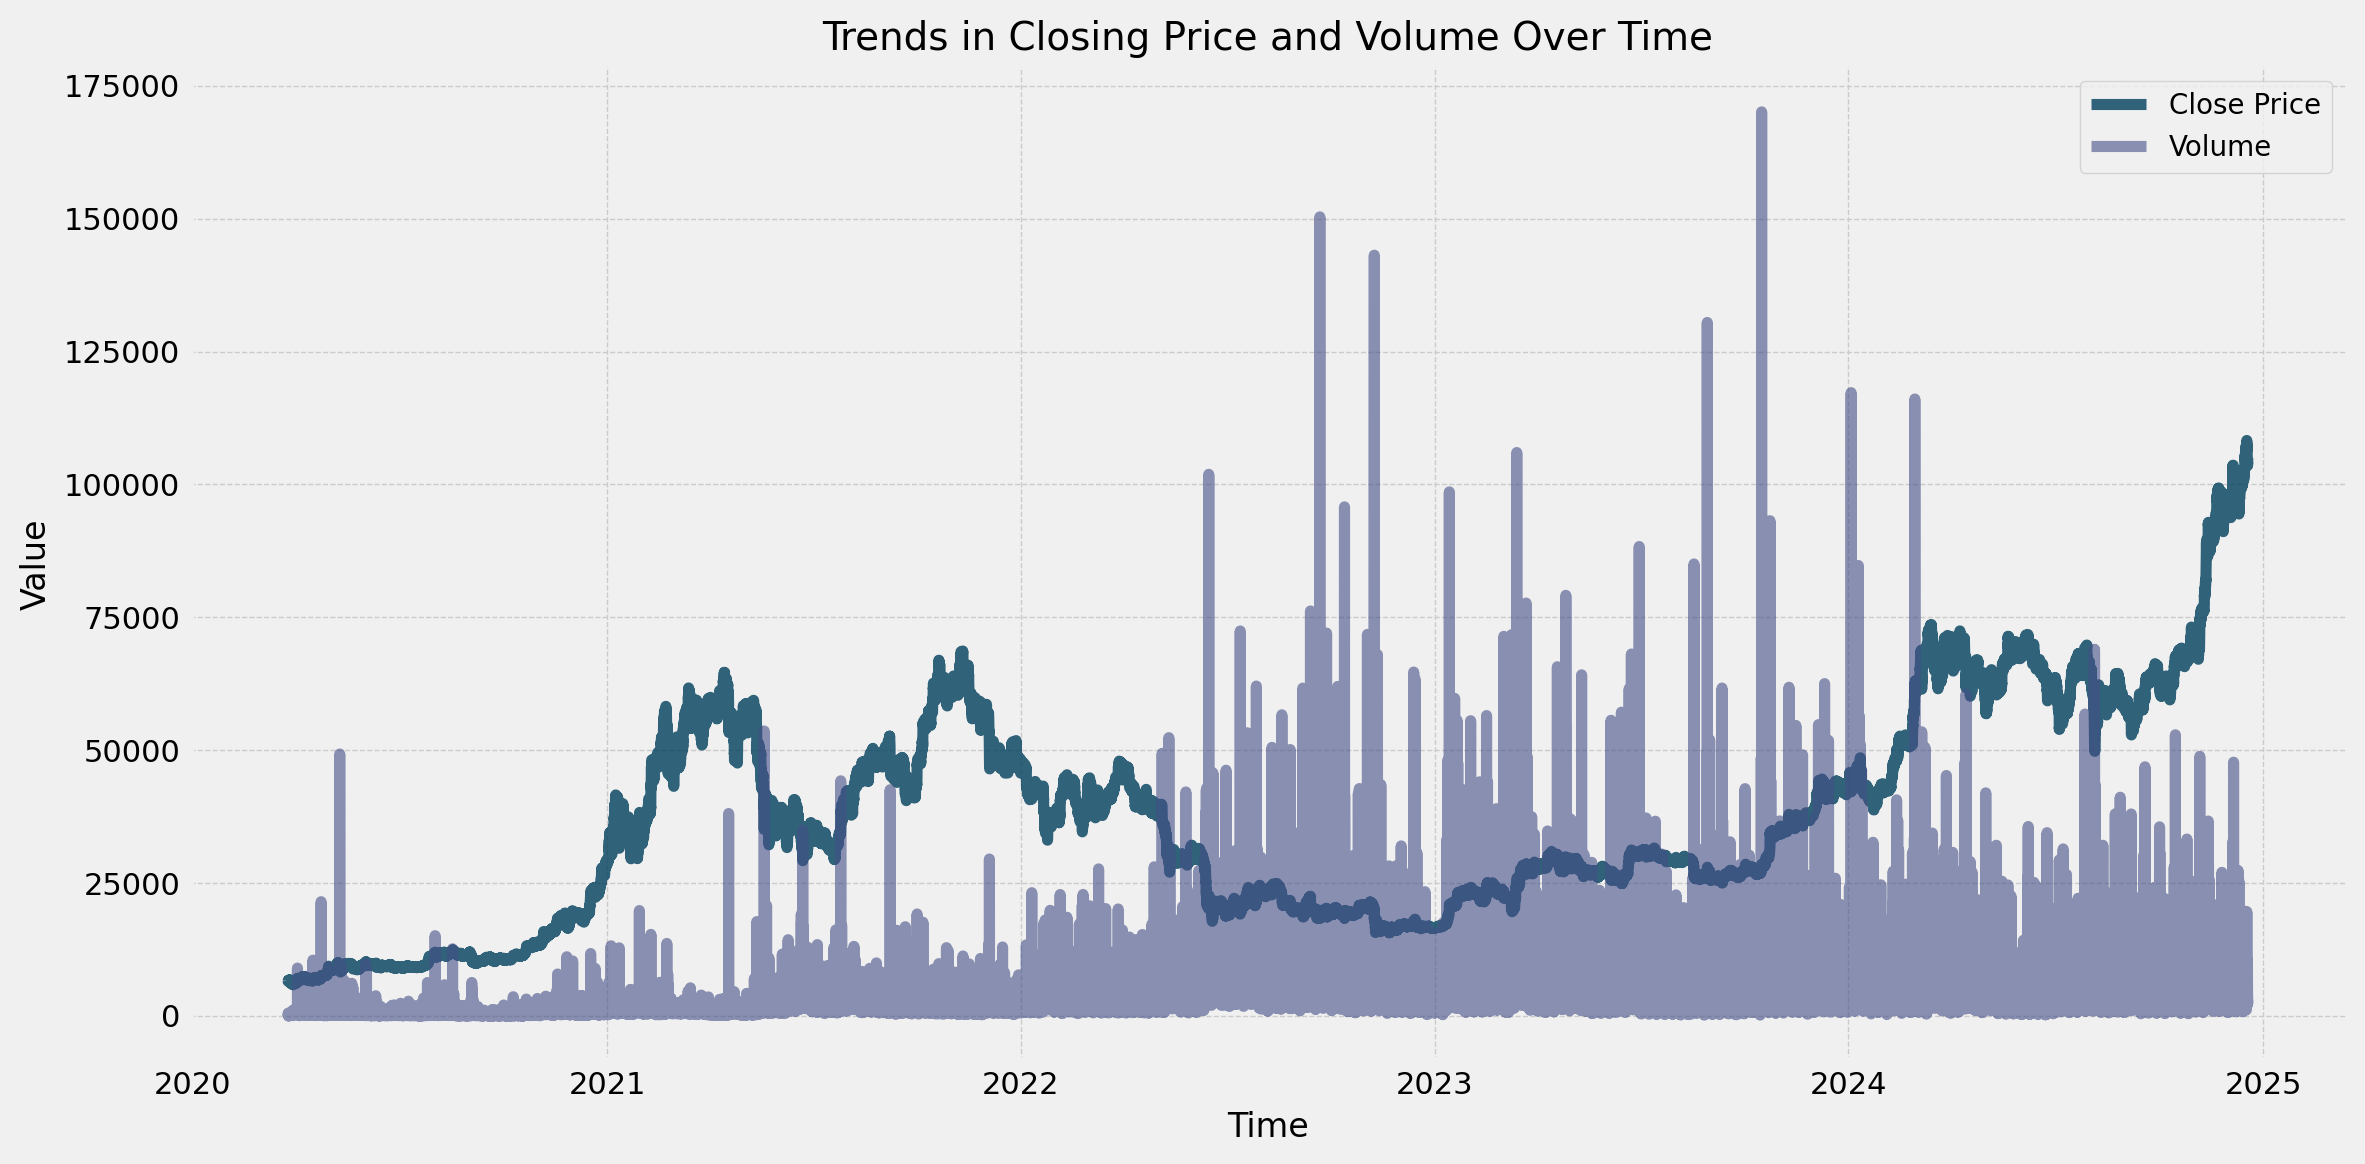

In [6]:
# Setting up the figure size for clear visibility
plt.figure(figsize=(12, 6))

# Visualizing trends for key metrics
# Plotting closing prices over time
plt.plot(data['time'], data['close_price'], label='Close Price', alpha=0.8)

# Plotting trading volume over time
plt.plot(data['time'], data['volume'], label='Volume', alpha=0.6)

# Enhancing the plot with titles and labels
plt.title('Trends in Closing Price and Volume Over Time', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Display the plot
plt.show()

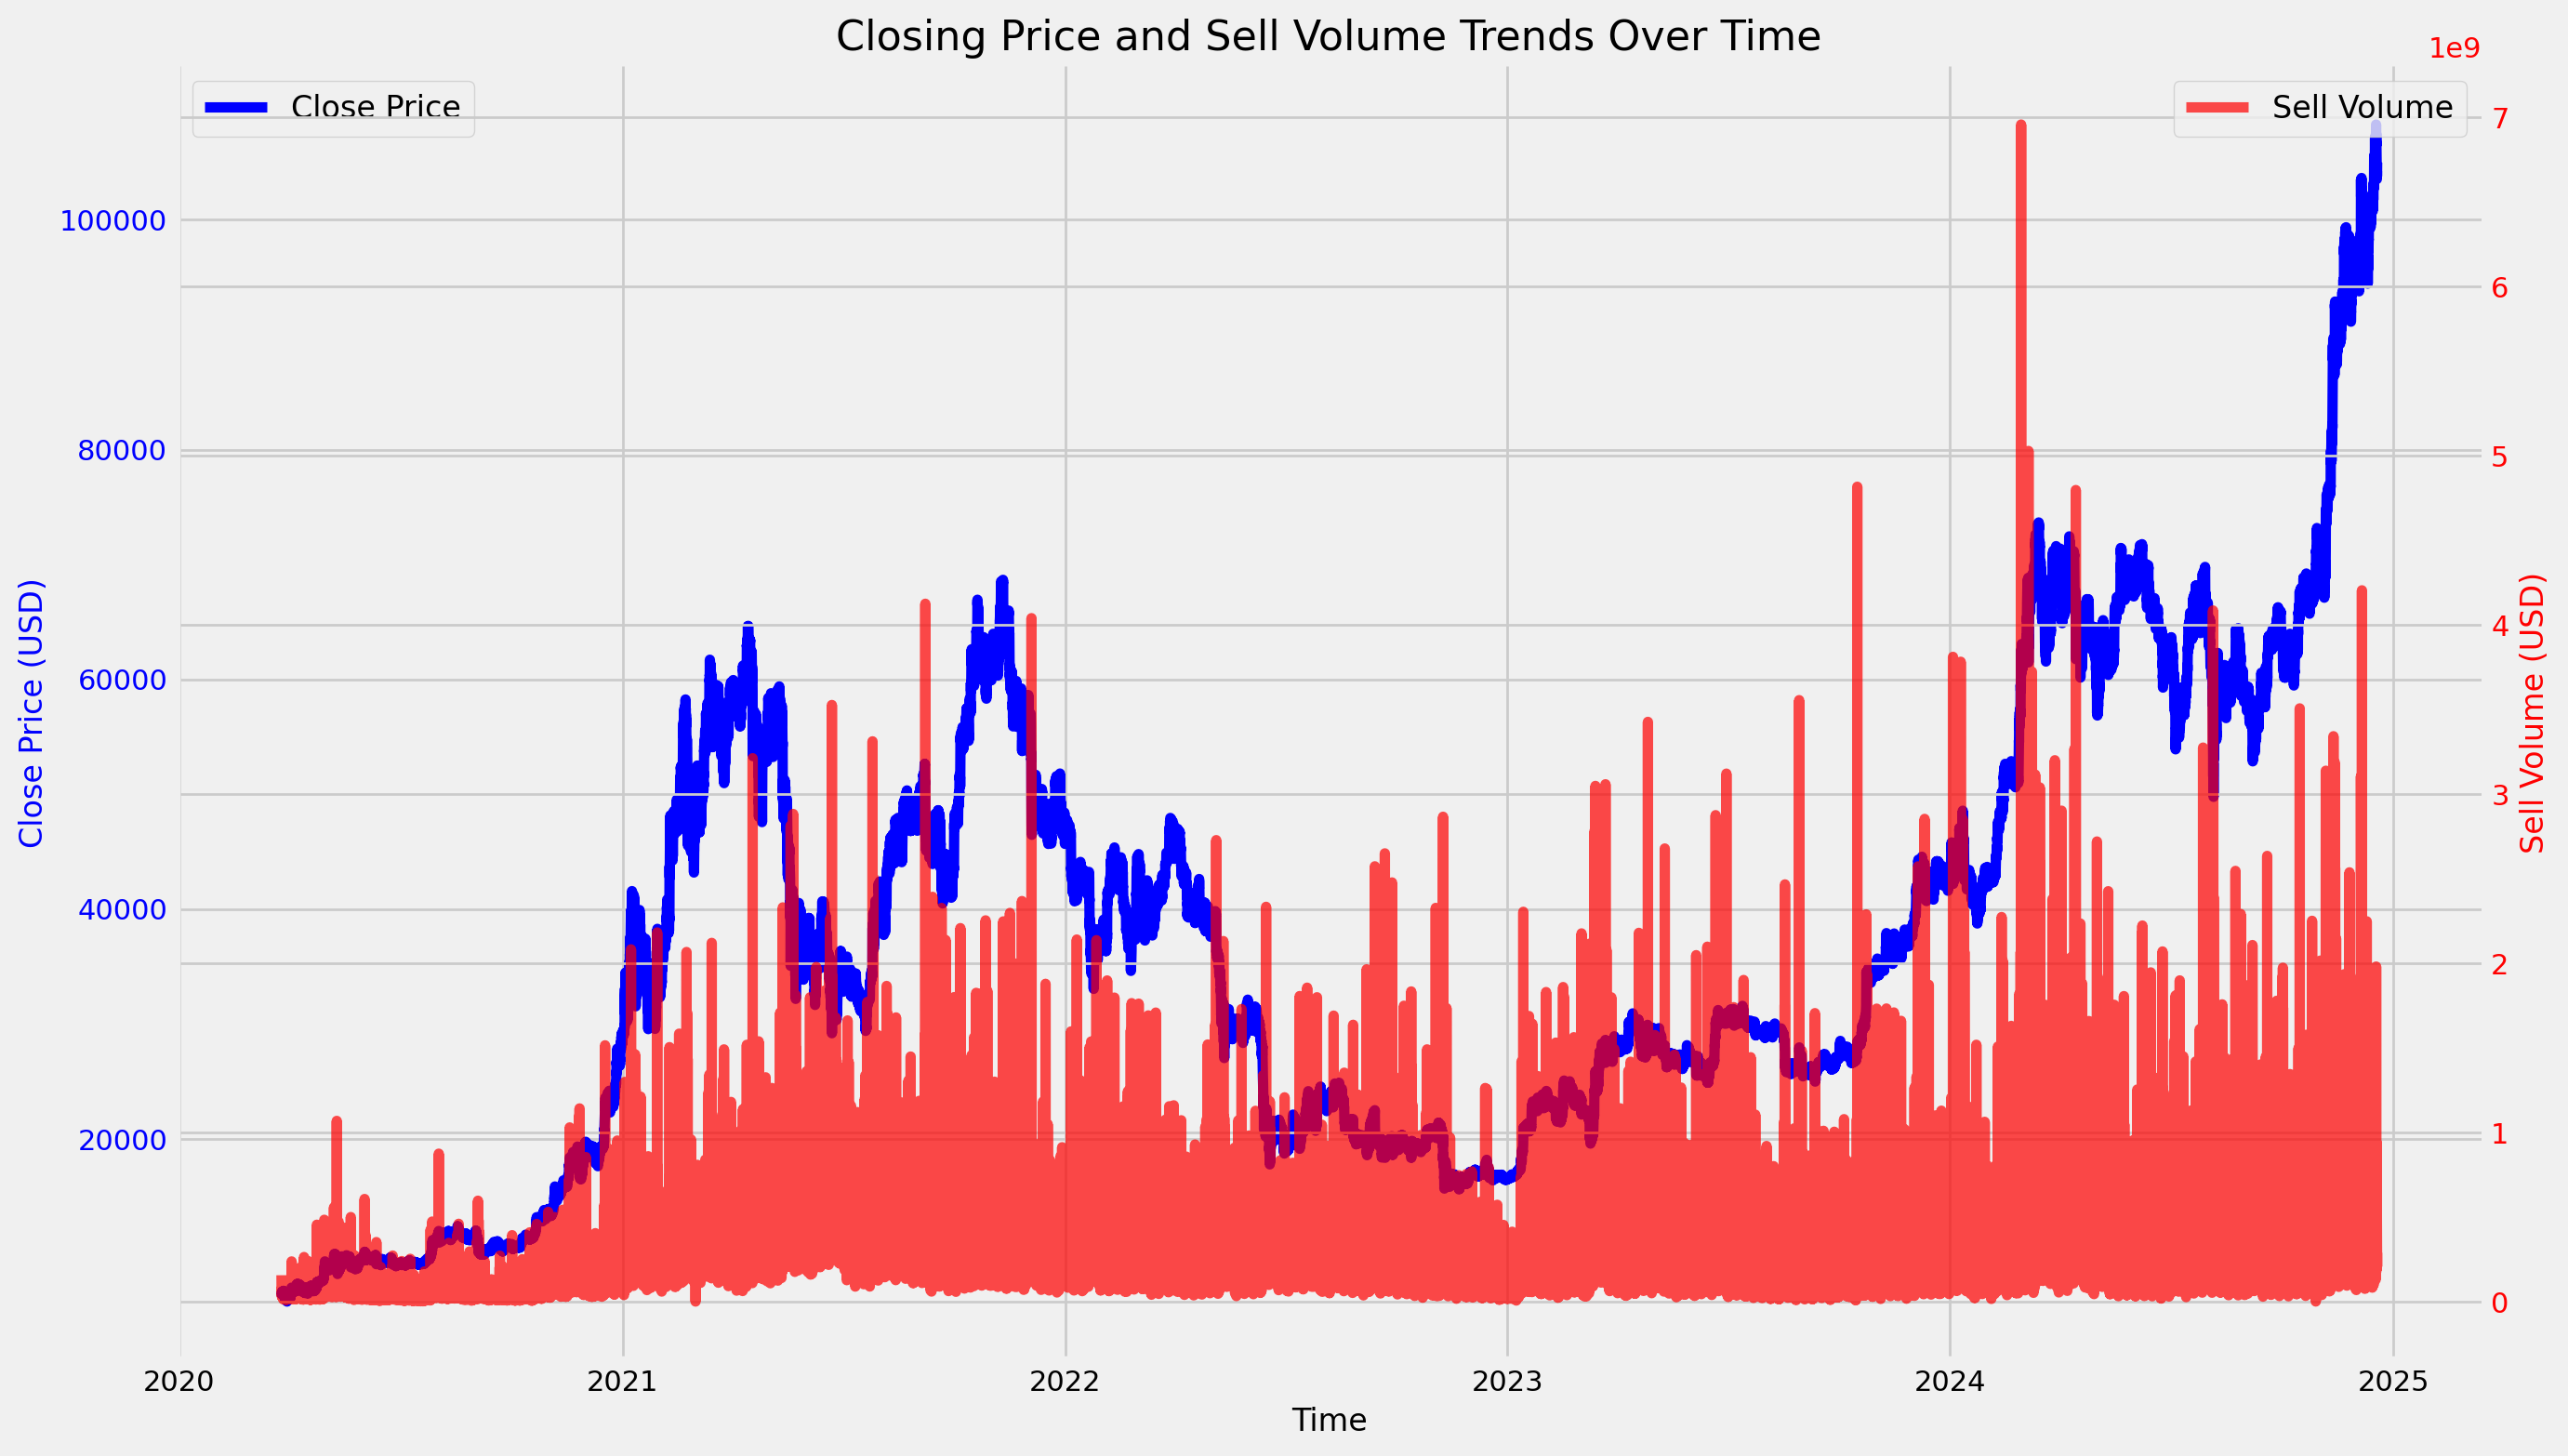

In [9]:
# Plot trends over time for closing price and taker sell volume
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot close price on the first y-axis
ax1.set_title('Closing Price and Sell Volume Trends Over Time', fontsize=16)
ax1.plot(data['time'], data['close_price'], label='Close Price', color='blue')
ax1.set_xlabel('Time', fontsize=12)
ax1.set_ylabel('Close Price (USD)', fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')

# Create a second y-axis for taker sell volume
ax2 = ax1.twinx()
ax2.plot(data['time'], data['taker_sell_volume'], label='Sell Volume', color='red', alpha=0.7)
ax2.set_ylabel('Sell Volume (USD)', fontsize=12, color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add legends and grid
ax2.legend(loc='upper right')
fig.tight_layout()
plt.grid(True)

# Show the combined plot
plt.show()


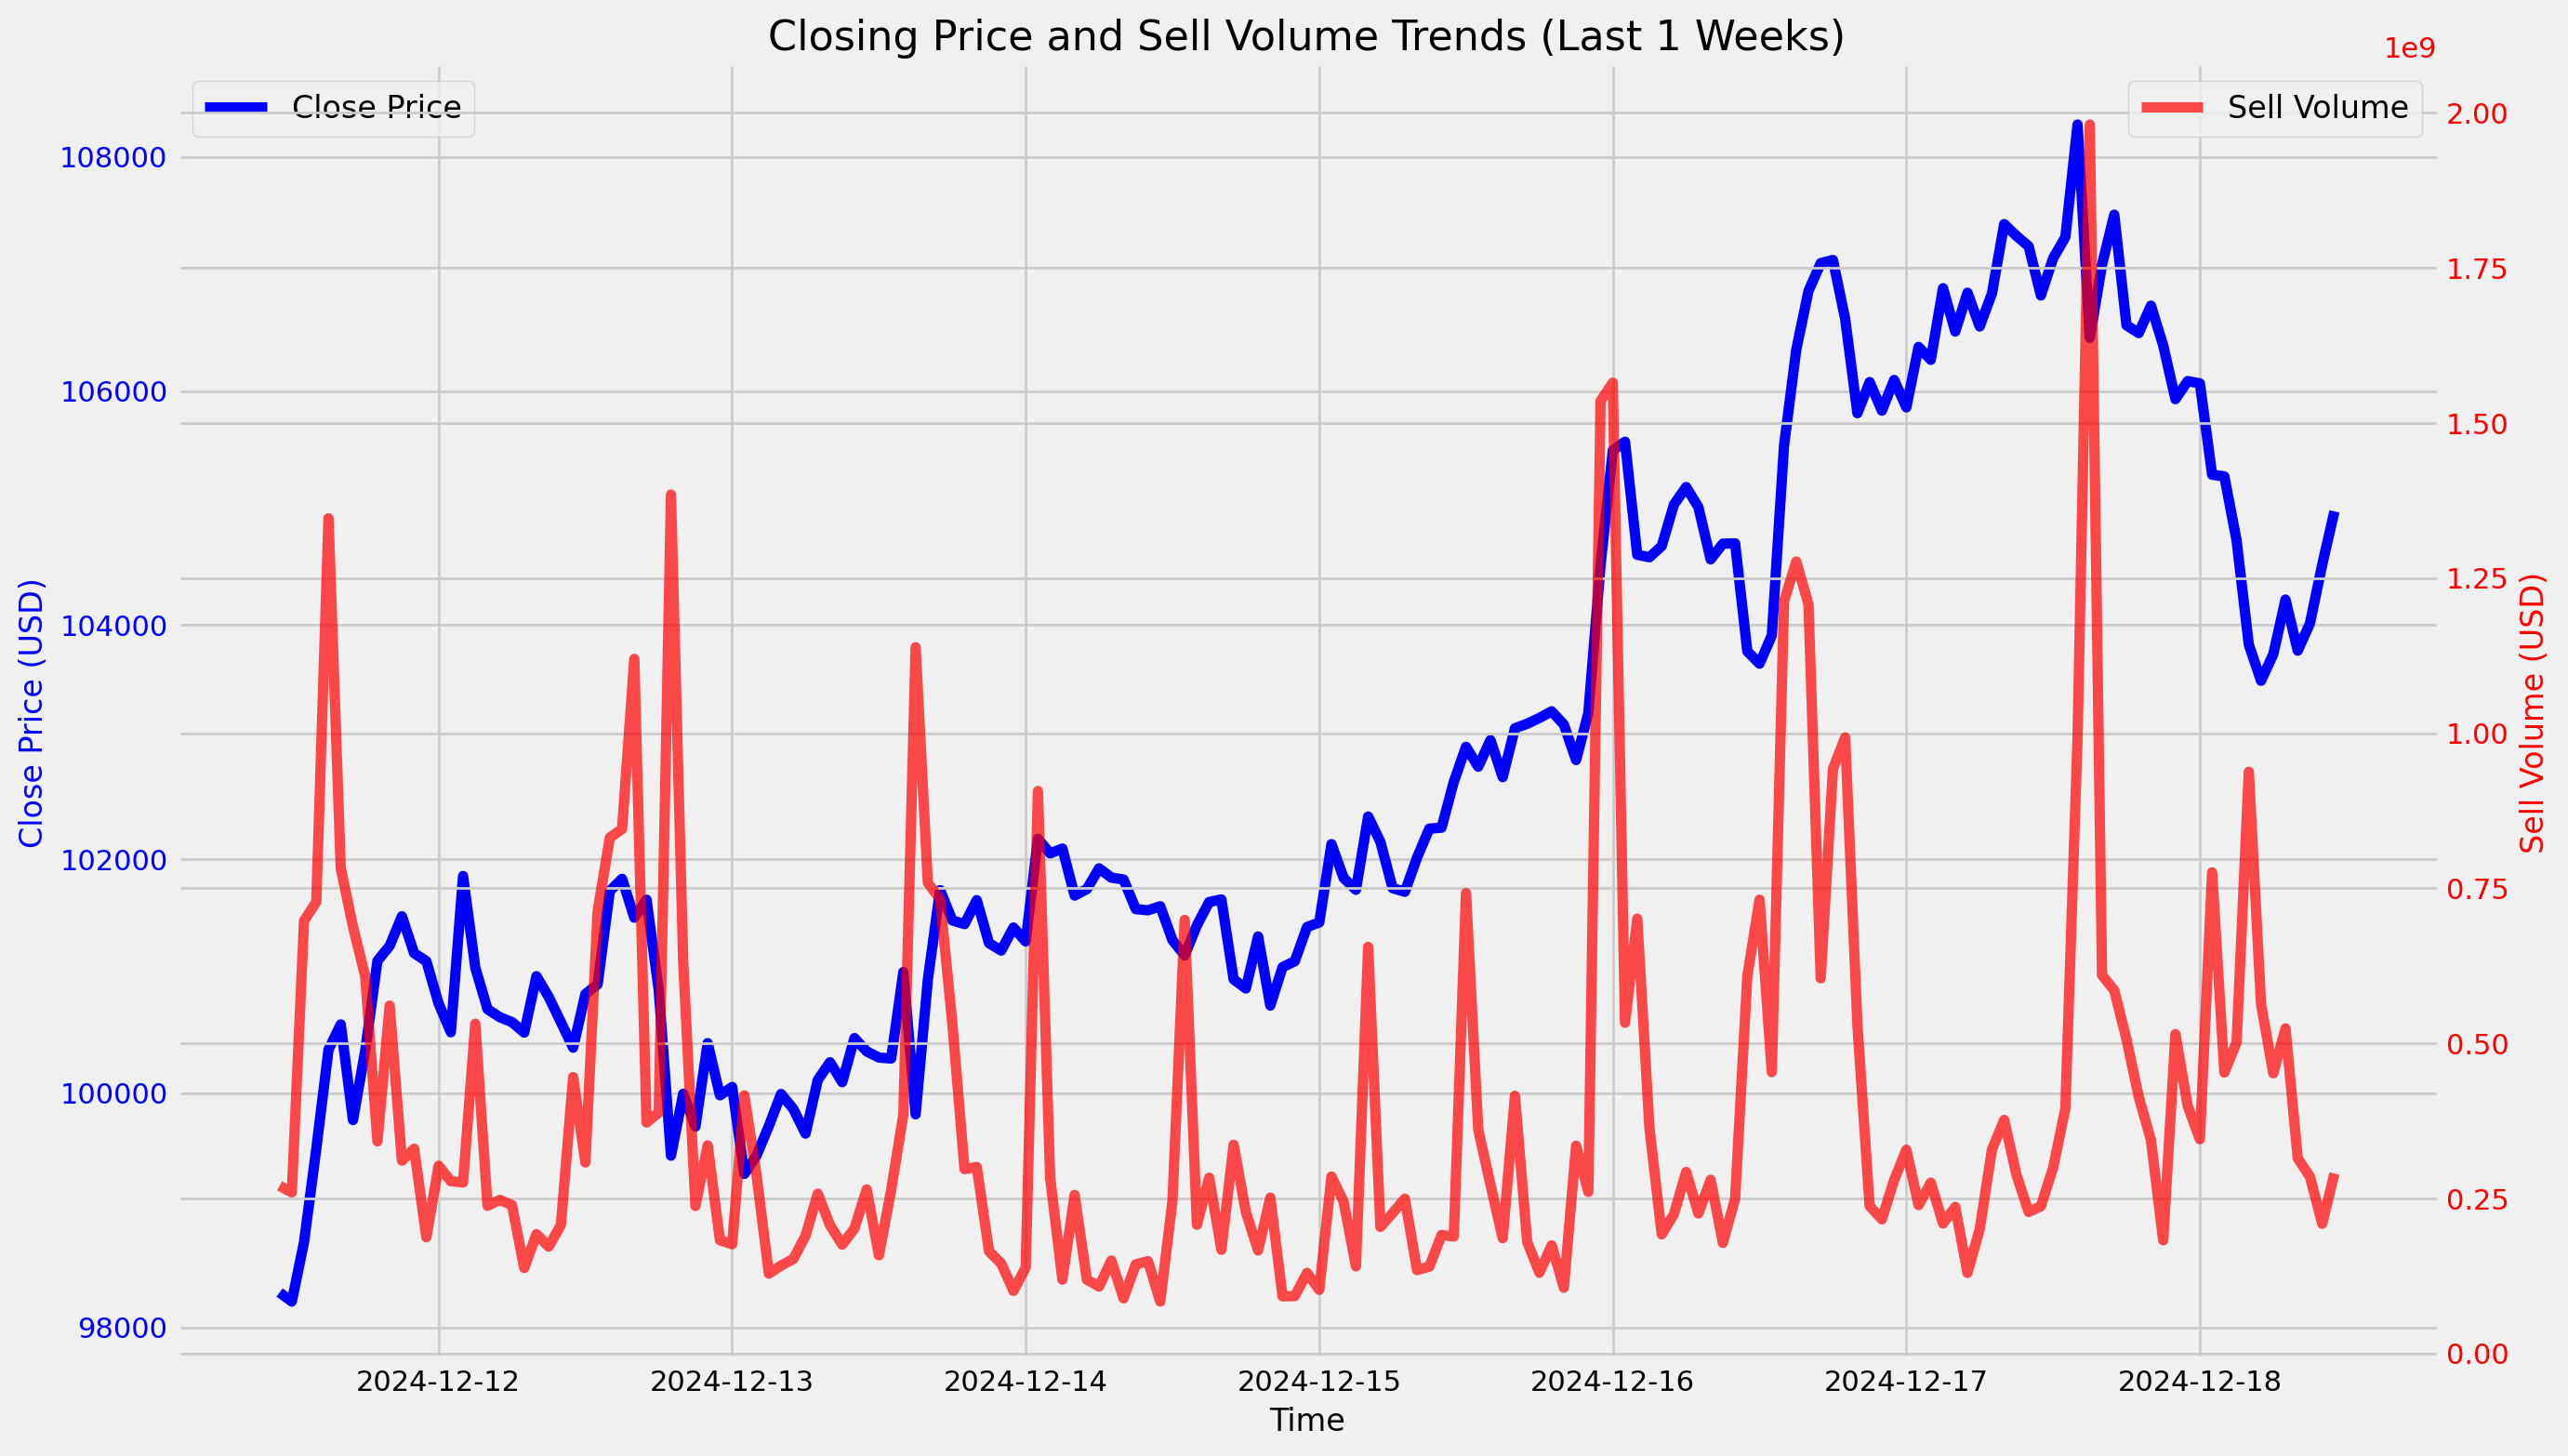

In [13]:
# Filter data for the last 7 weeks
last_1_weeks = data[data['time'] >= data['time'].max() - pd.Timedelta(weeks=1)]

# Plot trends over time for closing price and taker sell volume in the last 1 weeks
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot close price on the first y-axis
ax1.set_title('Closing Price and Sell Volume Trends (Last 1 Weeks)', fontsize=16)
ax1.plot(last_1_weeks['time'], last_1_weeks['close_price'], label='Close Price', color='blue')
ax1.set_xlabel('Time', fontsize=12)
ax1.set_ylabel('Close Price (USD)', fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')

# Create a second y-axis for taker sell volume
ax2 = ax1.twinx()
ax2.plot(last_1_weeks['time'], last_1_weeks['taker_sell_volume'], label='Sell Volume', color='red', alpha=0.7)
ax2.set_ylabel('Sell Volume (USD)', fontsize=12, color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add legends and grid
ax2.legend(loc='upper right')
fig.tight_layout()
plt.grid(True)

# Show the combined plot
plt.show()


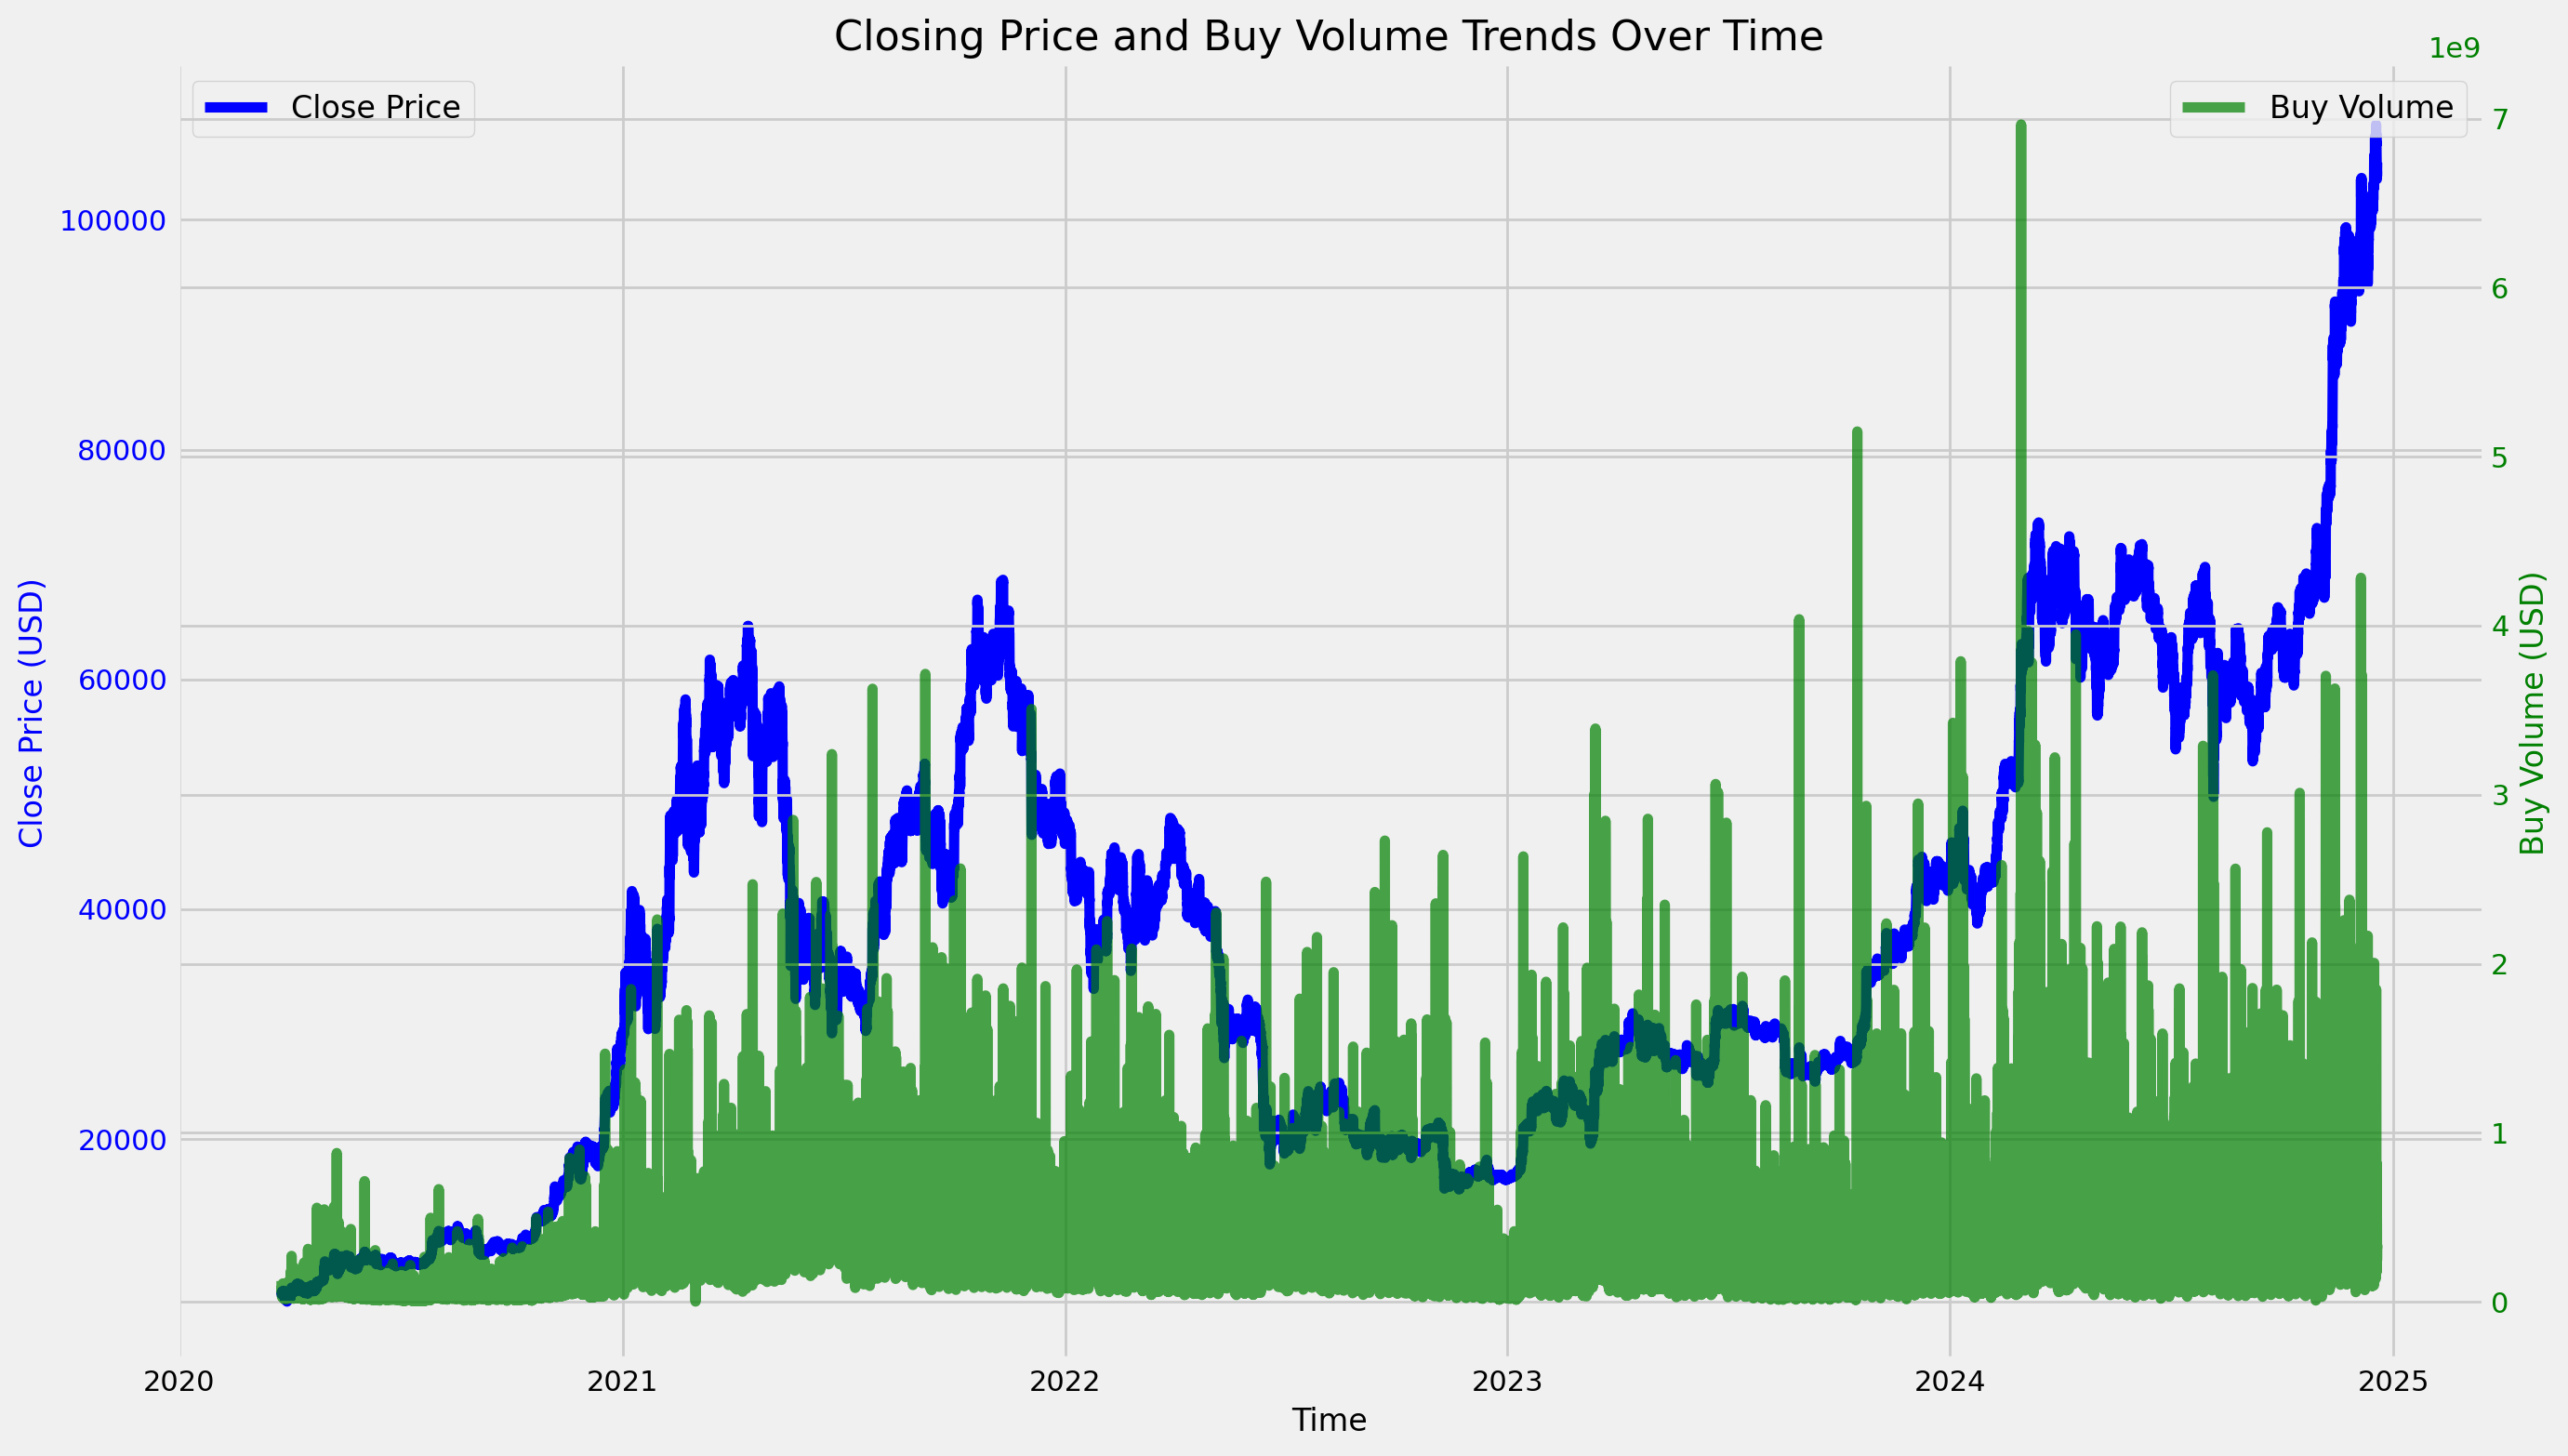

In [10]:
# Plot trends over time for closing price and taker sell volume
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot close price on the first y-axis
ax1.set_title('Closing Price and Buy Volume Trends Over Time', fontsize=16)
ax1.plot(data['time'], data['close_price'], label='Close Price', color='blue')
ax1.set_xlabel('Time', fontsize=12)
ax1.set_ylabel('Close Price (USD)', fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')

# Create a second y-axis for taker sell volume
ax2 = ax1.twinx()
ax2.plot(data['time'], data['taker_buy_volume'], label='Buy Volume', color='green', alpha=0.7)
ax2.set_ylabel('Buy Volume (USD)', fontsize=12, color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Add legends and grid
ax2.legend(loc='upper right')
fig.tight_layout()
plt.grid(True)

# Show the combined plot
plt.show()

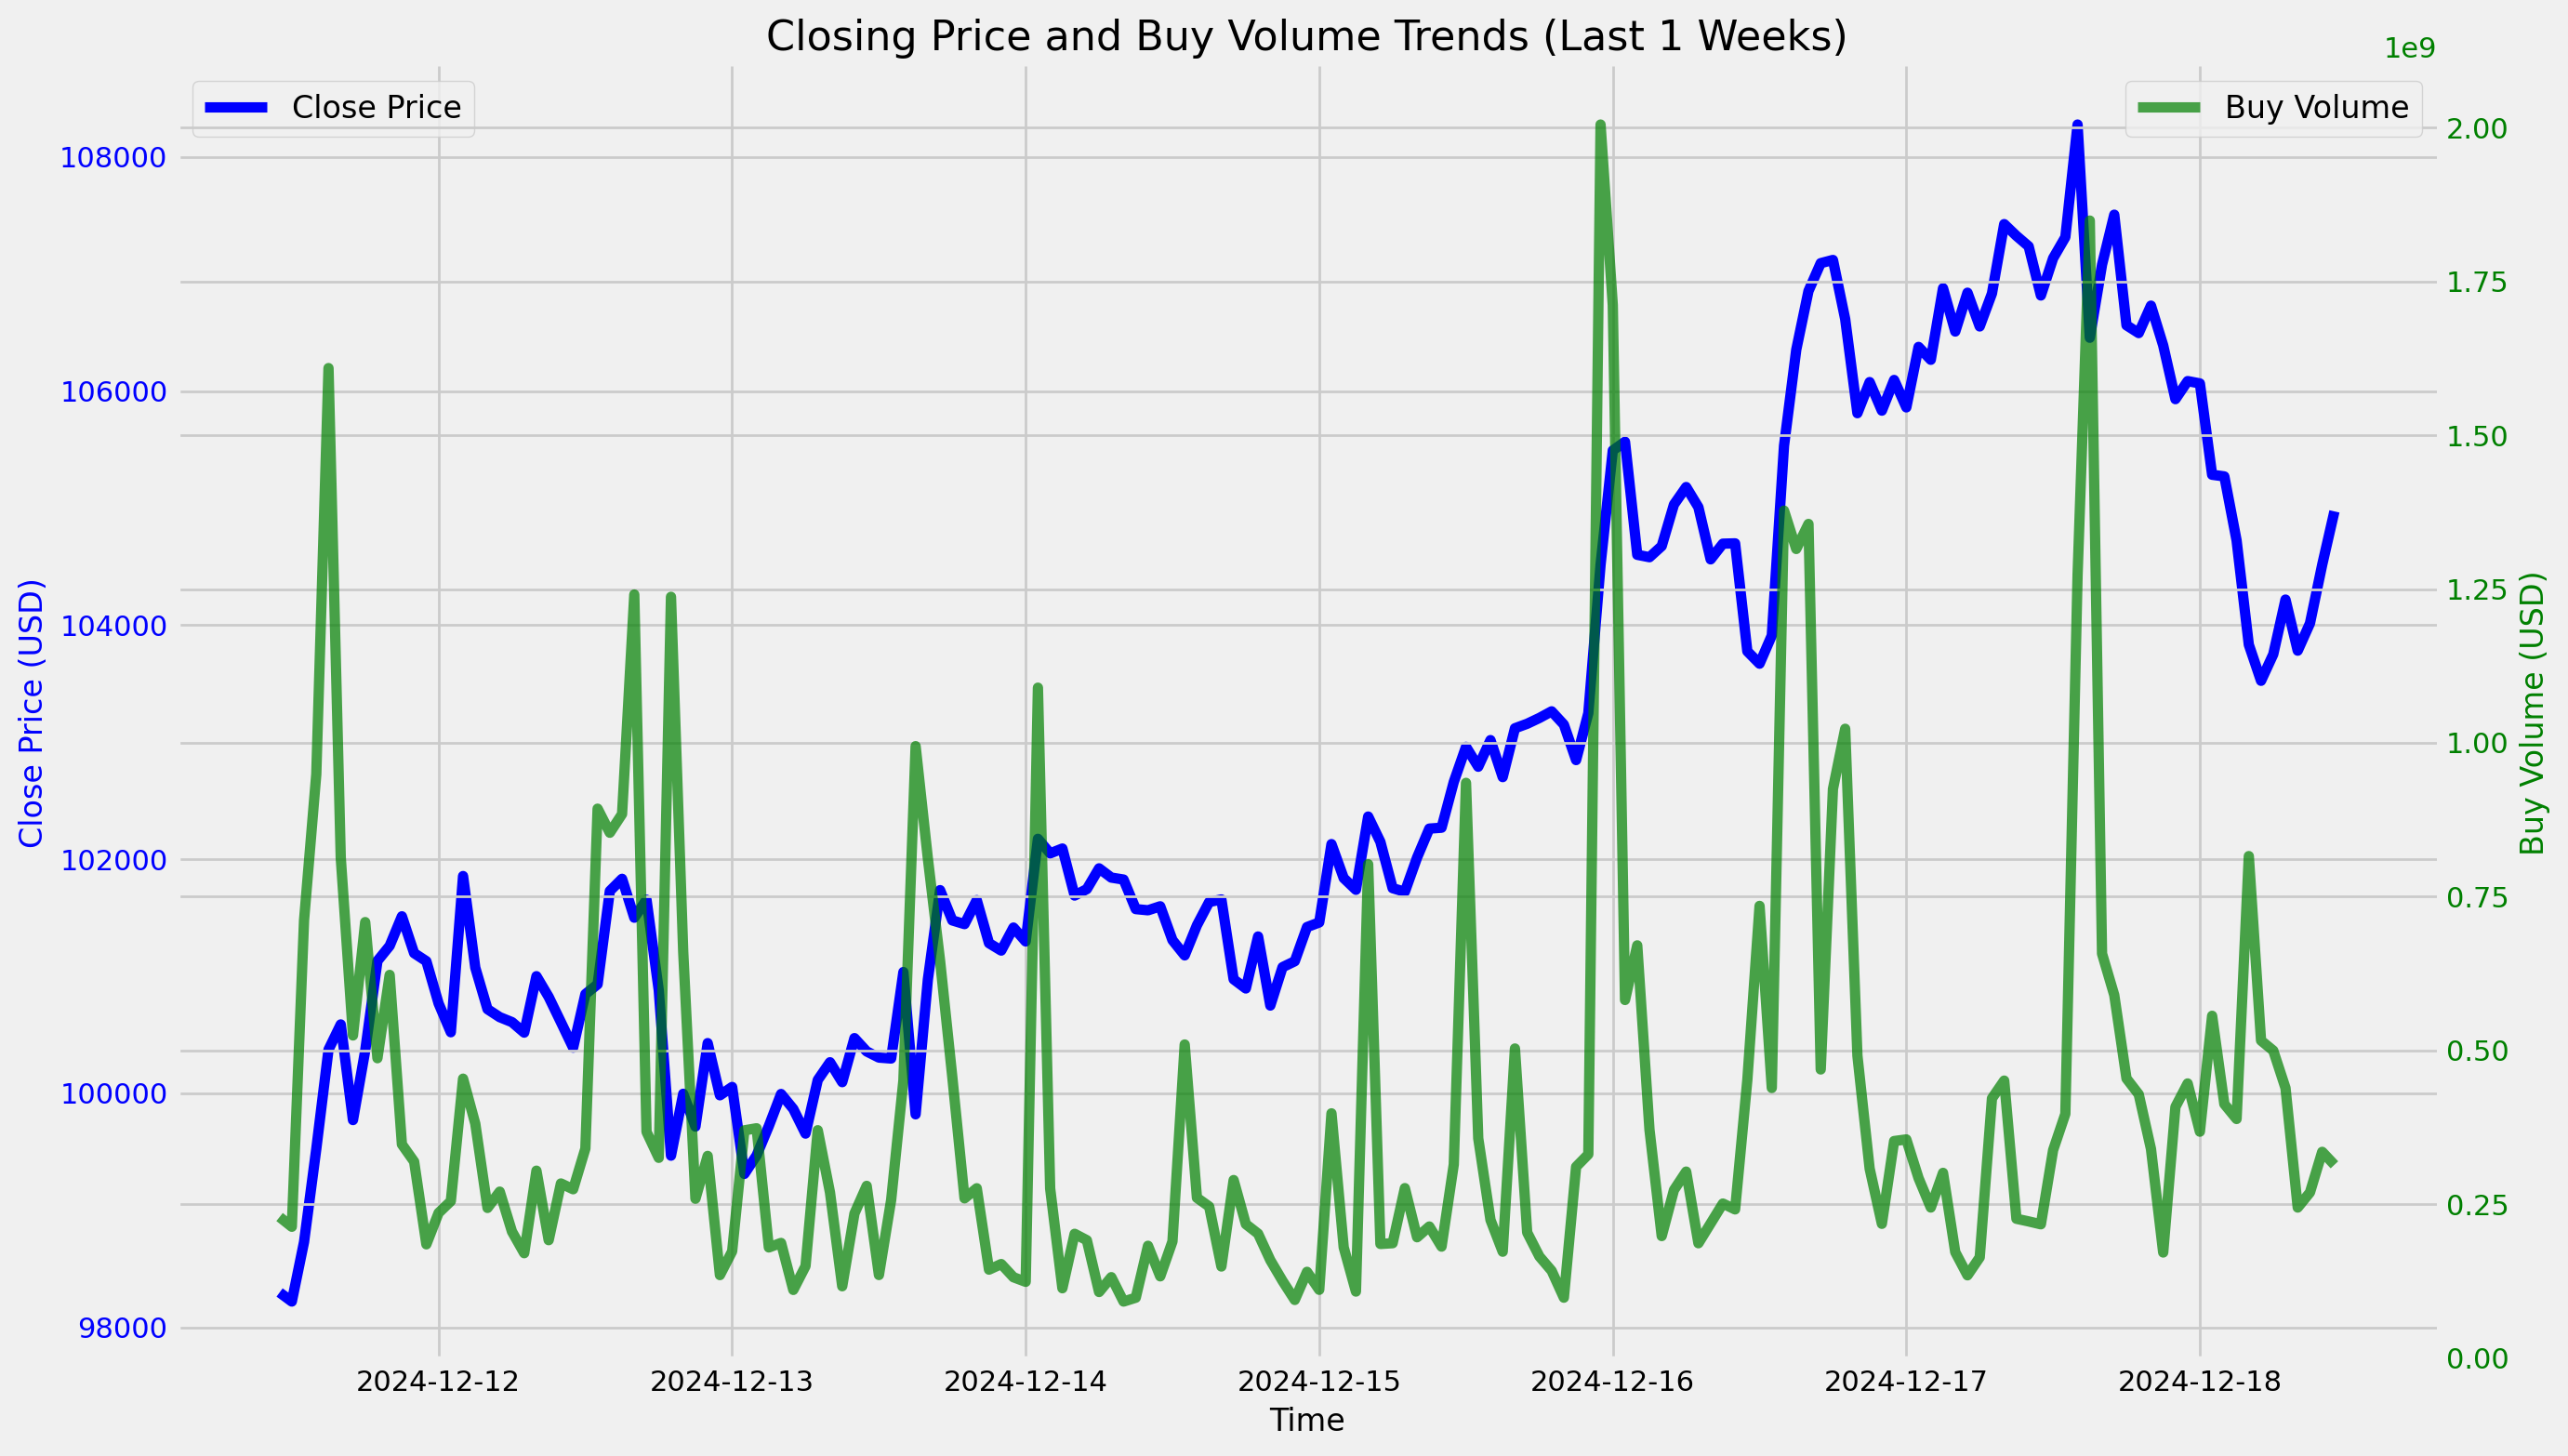

In [14]:
# Filter data for the last 7 weeks
last_1_weeks = data[data['time'] >= data['time'].max() - pd.Timedelta(weeks=1)]

# Plot trends over time for closing price and taker sell volume in the last 1 weeks
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot close price on the first y-axis
ax1.set_title('Closing Price and Buy Volume Trends (Last 1 Weeks)', fontsize=16)
ax1.plot(last_1_weeks['time'], last_1_weeks['close_price'], label='Close Price', color='blue')
ax1.set_xlabel('Time', fontsize=12)
ax1.set_ylabel('Close Price (USD)', fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')

# Create a second y-axis for taker sell volume
ax2 = ax1.twinx()
ax2.plot(last_1_weeks['time'], last_1_weeks['taker_buy_volume'], label='Buy Volume', color='green', alpha=0.7)
ax2.set_ylabel('Buy Volume (USD)', fontsize=12, color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Add legends and grid
ax2.legend(loc='upper right')
fig.tight_layout()
plt.grid(True)

# Show the combined plot
plt.show()

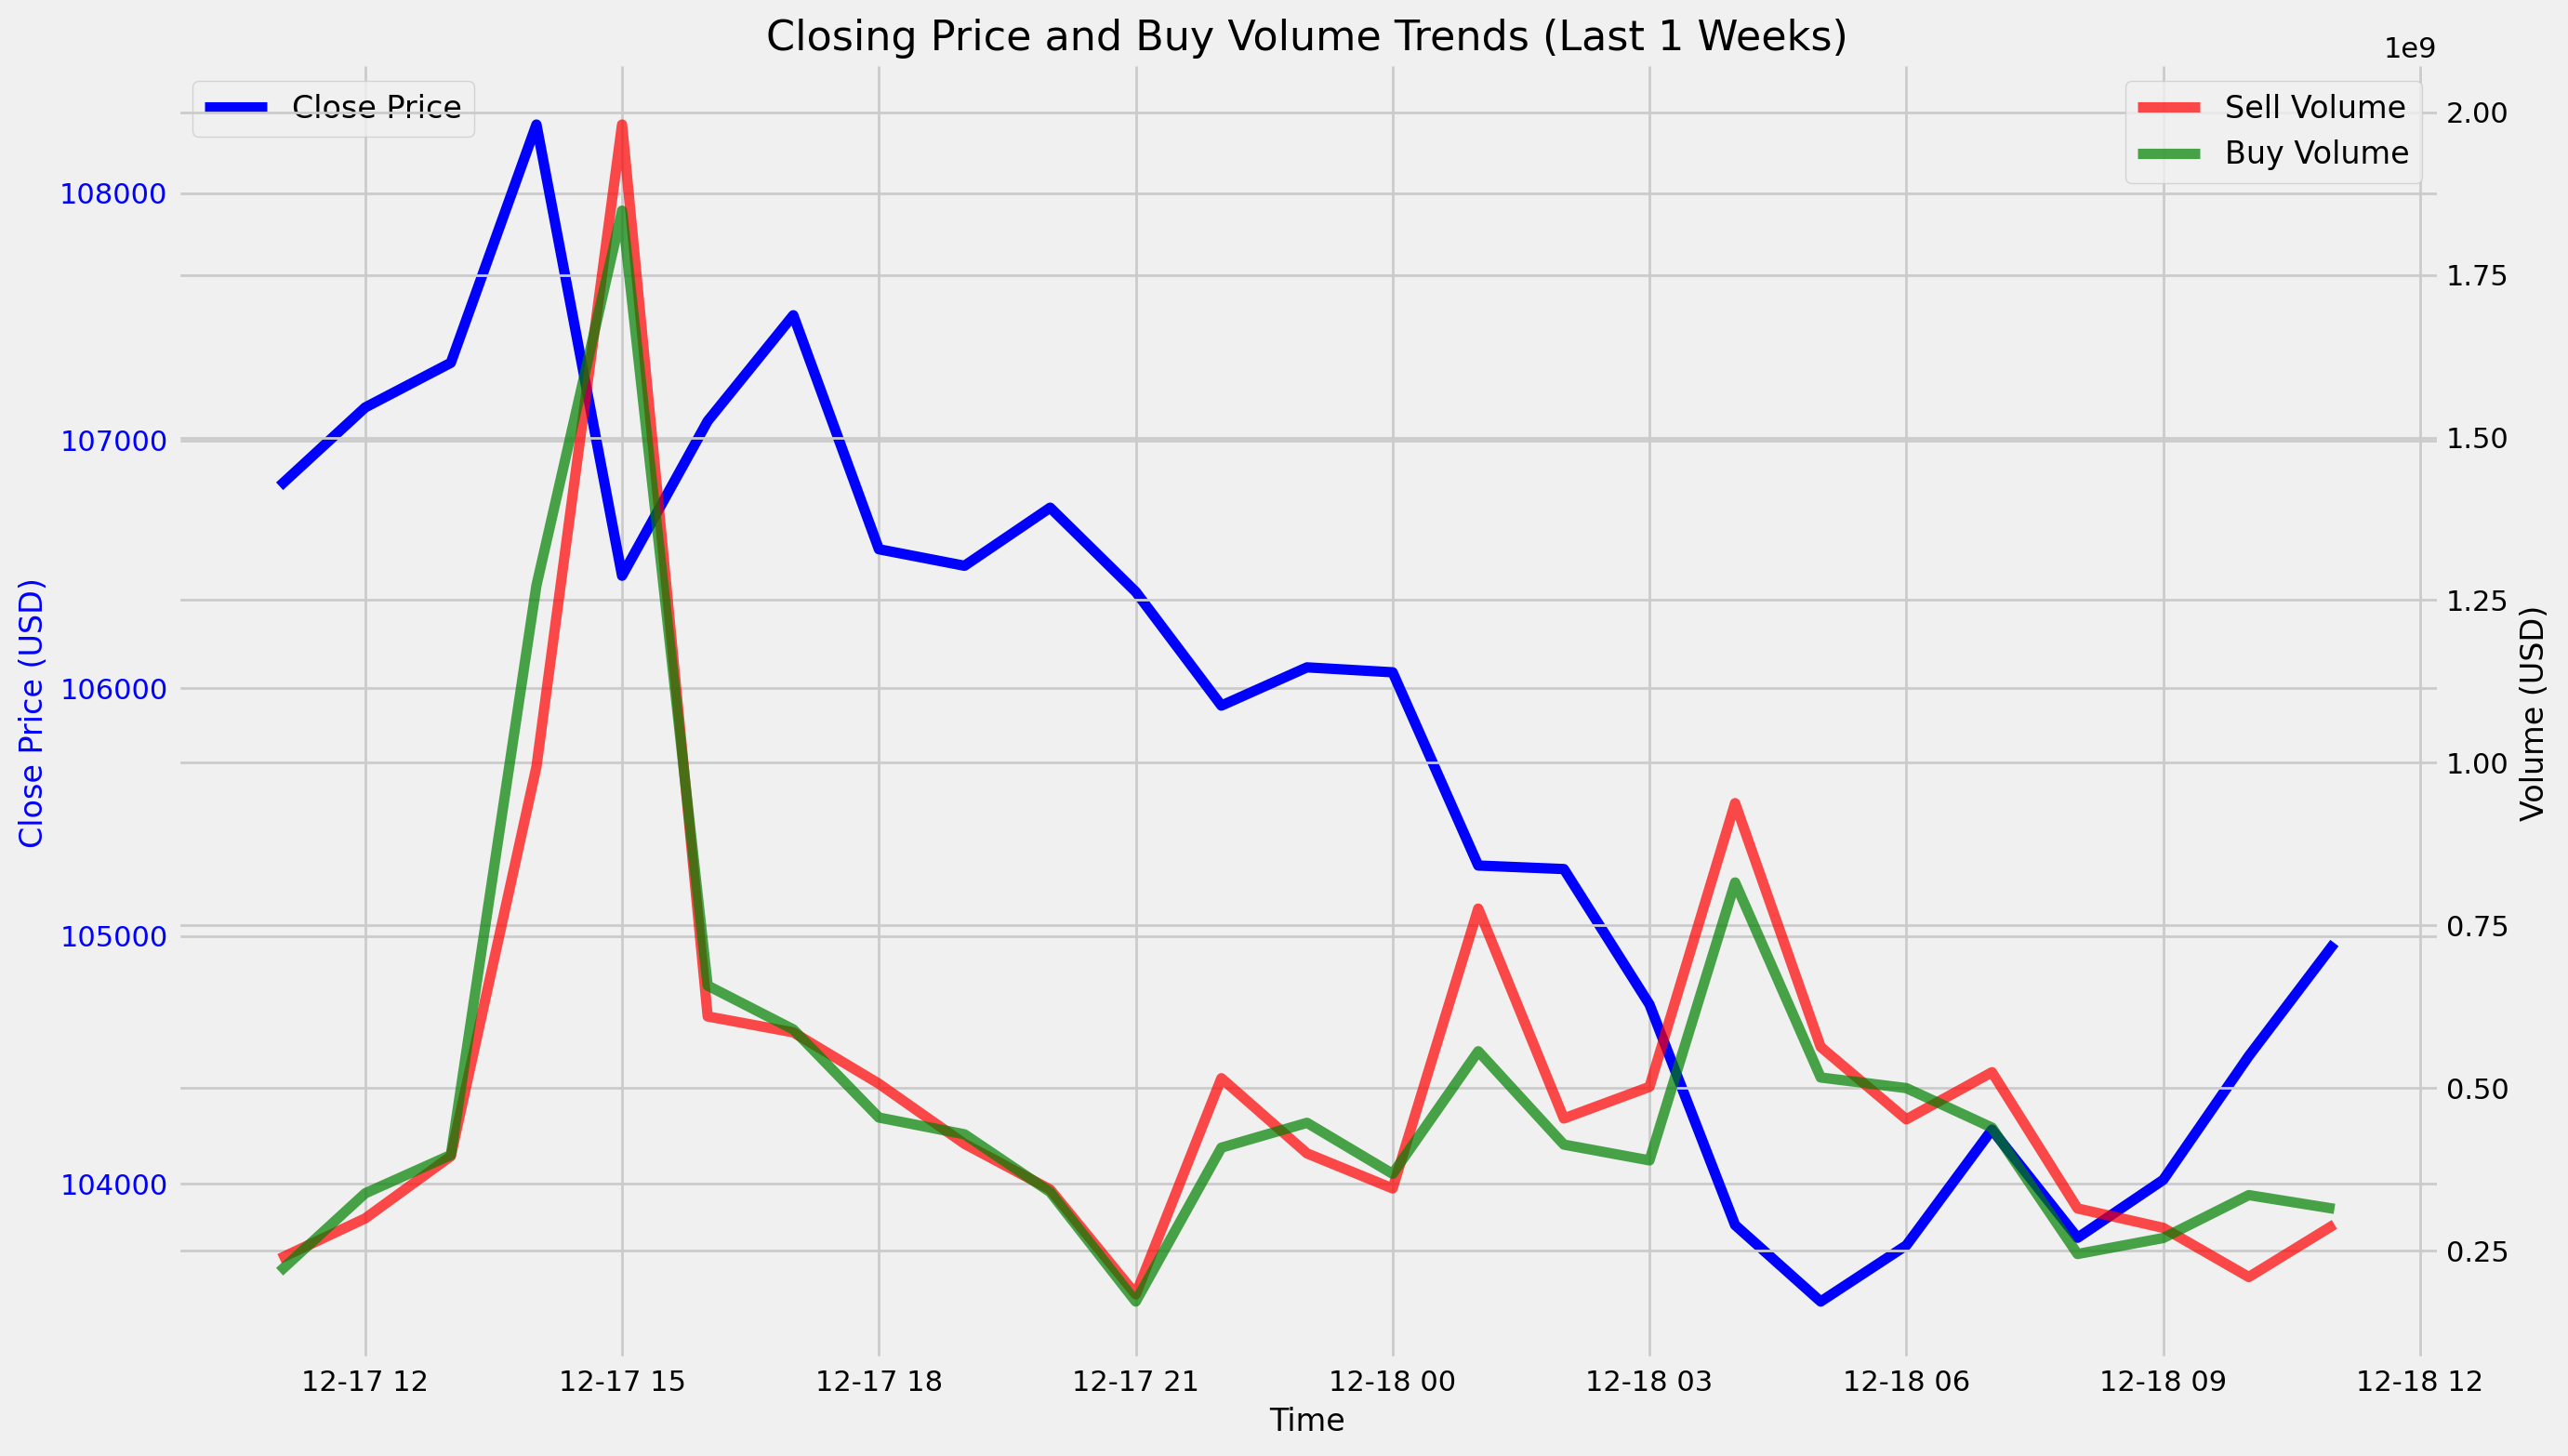

In [16]:
# Filter data for the last 7 weeks
last_1_weeks = data[data['time'] >= data['time'].max() - pd.Timedelta(hours=24)]

# Plot trends over time for closing price and taker sell volume in the last 1 weeks
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot close price on the first y-axis
ax1.set_title('Closing Price and Buy Volume Trends (Last 1 Weeks)', fontsize=16)
ax1.plot(last_1_weeks['time'], last_1_weeks['close_price'], label='Close Price', color='blue')
ax1.set_xlabel('Time', fontsize=12)
ax1.set_ylabel('Close Price (USD)', fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')

# Create a second y-axis for taker sell volume
ax2 = ax1.twinx()
ax2.plot(last_1_weeks['time'], last_1_weeks['taker_sell_volume'], label='Sell Volume', color='red', alpha=0.7)
ax2.plot(last_1_weeks['time'], last_1_weeks['taker_buy_volume'], label='Buy Volume', color='green', alpha=0.7)
ax2.set_ylabel('Volume (USD)', fontsize=12, color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Add legends and grid
ax2.legend(loc='upper right')
fig.tight_layout()
plt.grid(True)

# Show the combined plot
plt.show()

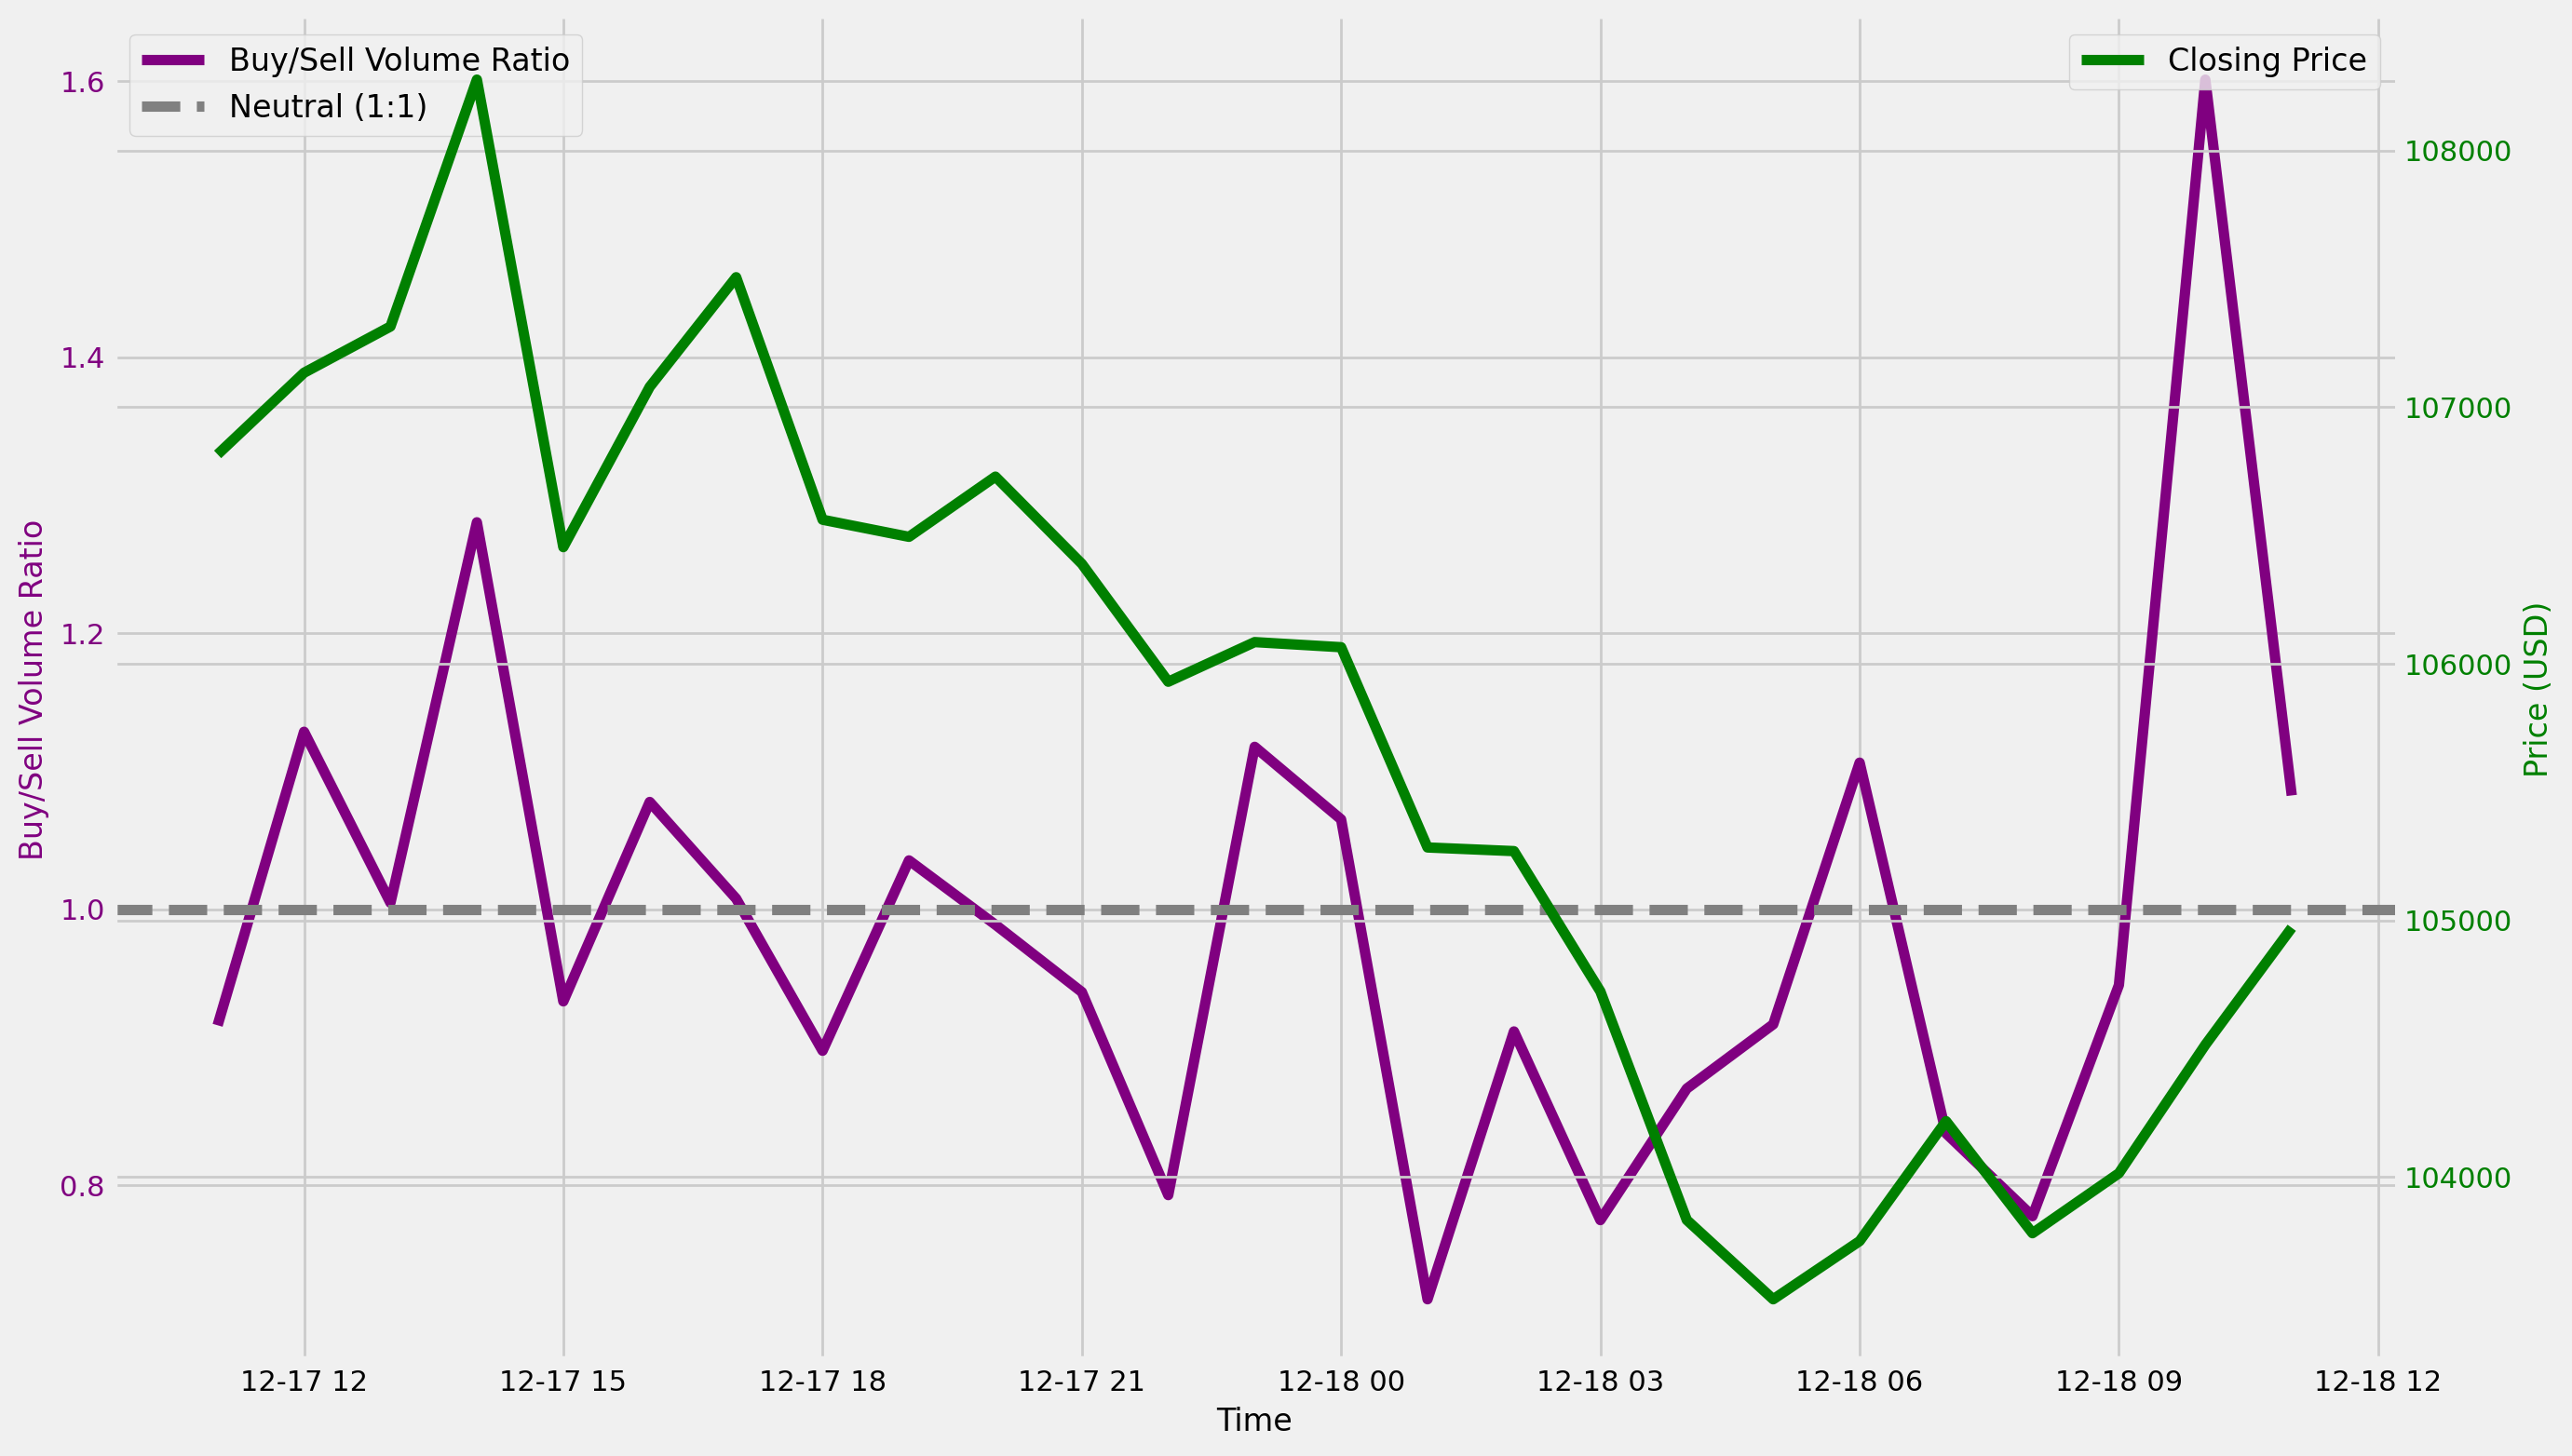

In [24]:
# Filter data for the last 24 hours
last_1_weeks = data[data['time'] >= data['time'].max() - pd.Timedelta(hours=24)]

# Plot the buy vs sell volume ratio along with opening and closing prices over the last 24 hours
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot buy/sell volume ratio on the first y-axis
ax1.plot(last_1_weeks['time'], last_1_weeks['taker_buy_sell_ratio'], label='Buy/Sell Volume Ratio', color='purple')
ax1.set_xlabel('Time', fontsize=12)
ax1.set_ylabel('Buy/Sell Volume Ratio', fontsize=12, color='purple')
ax1.axhline(y=1, color='gray', linestyle='--', label='Neutral (1:1)')
ax1.tick_params(axis='y', labelcolor='purple')
ax1.legend(loc='upper left')

# Create a second y-axis for opening and closing prices
ax2 = ax1.twinx()
# ax2.plot(last_1_weeks['time'], last_1_weeks['open_price'], label='Opening Price', color='blue')
ax2.plot(last_1_weeks['time'], last_1_weeks['close_price'], label='Closing Price', color='green')
ax2.set_ylabel('Price (USD)', fontsize=12, color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Add legends and grid
ax2.legend(loc='upper right')
fig.tight_layout()
plt.grid(True)

# Show the combined plot
plt.show()



### Moving Average Crossover Strategy

C:\Users\MCYK\AppData\Local\Temp\ipykernel_27180\4228644313.py:17: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] > signals['long_mavg'][short_window:], 1.0, 0.0

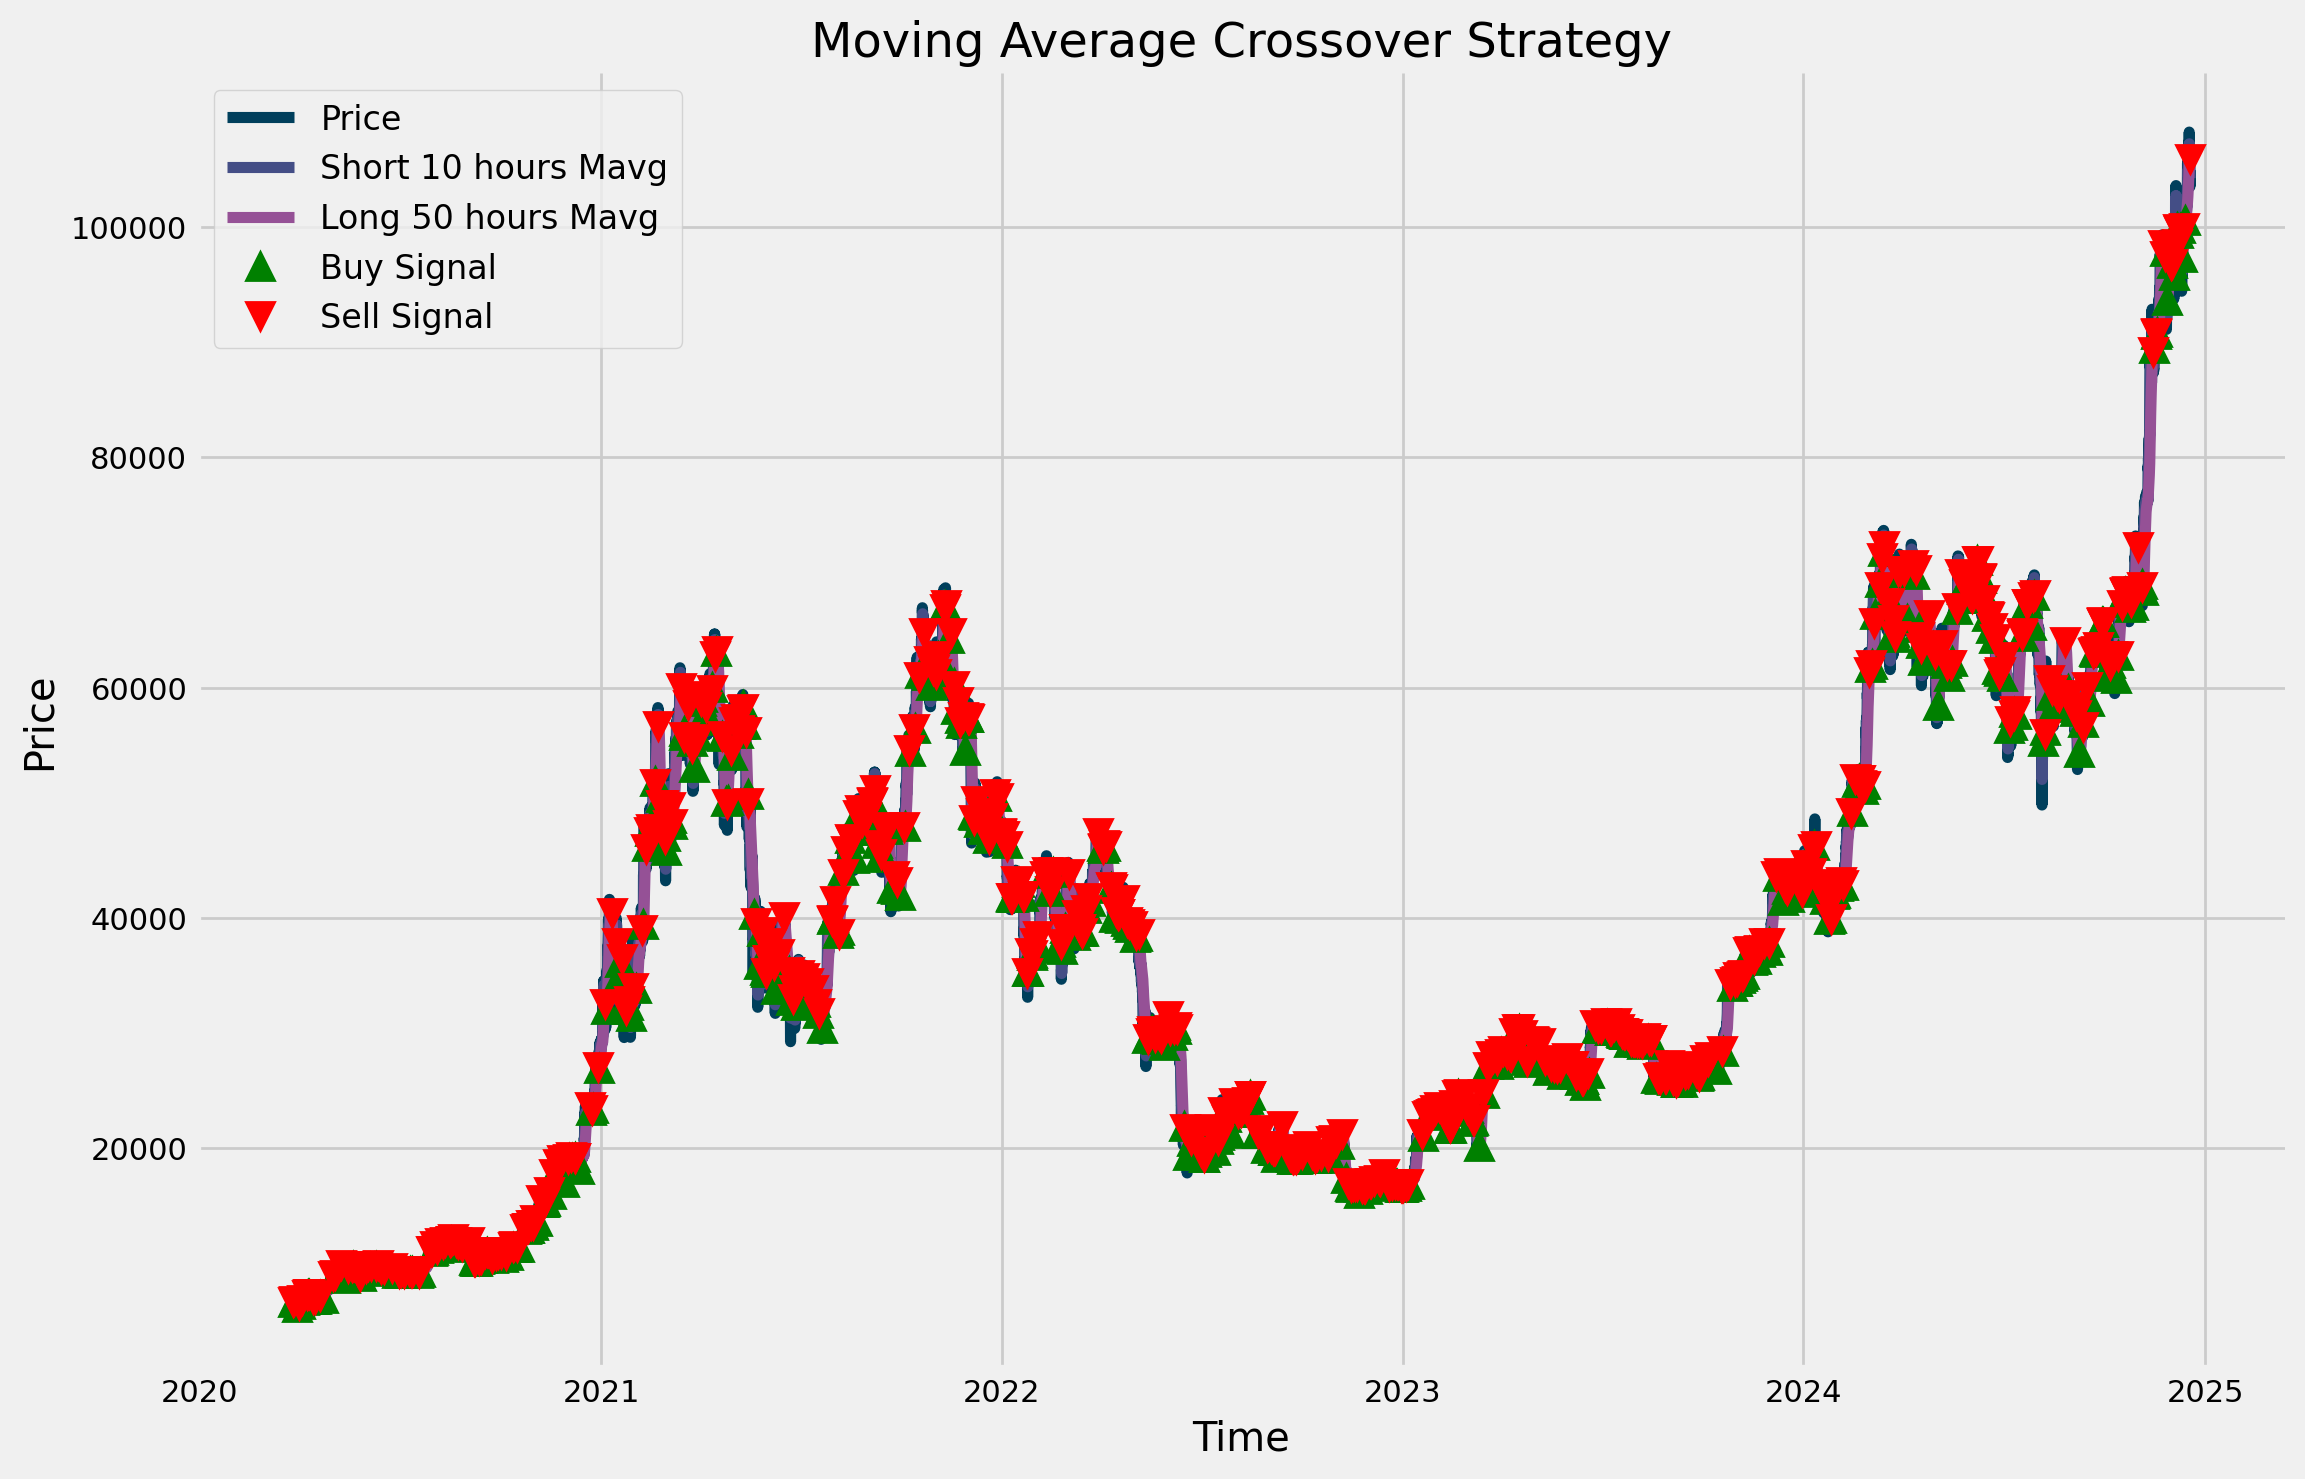

In [57]:
# Ensure 'time' is datetime and set as index
data['time'] = pd.to_datetime(data['time'])
data.set_index('time', inplace=True)

# Define a function to implement the moving average crossover strategy
def moving_average_crossover_strategy(prices, short_window, long_window):
    signals = pd.DataFrame(index=prices.index)
    signals['signal'] = 0.0

    # Create short simple moving average
    signals['short_mavg'] = prices.rolling(window=short_window, min_periods=1, center=False).mean()

    # Create long simple moving average
    signals['long_mavg'] = prices.rolling(window=long_window, min_periods=1, center=False).mean()

    # Create signals
    signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] > signals['long_mavg'][short_window:], 1.0, 0.0)

    # Generate trading orders
    signals['positions'] = signals['signal'].diff()

    return signals

# Define short and long windows for the moving averages
short_window = 10
long_window = 50

# Use closing price for strategy implementation
prices = data['close_price']
# last_1_weeks = data[data['time'] >= data['time'].max() - pd.Timedelta(days=7)]
# prices = last_1_weeks['close_price']

# Get signals from the moving average crossover strategy
signals = moving_average_crossover_strategy(prices, short_window, long_window)

# Plot the price data with buy and sell signals
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(prices.index, prices, label='Price')
ax.plot(signals.index, signals['short_mavg'], label=f'Short {short_window} hours Mavg')
ax.plot(signals.index, signals['long_mavg'], label=f'Long {long_window} hours Mavg')

# Plotting buy signals
ax.plot(signals.loc[signals.positions == 1.0].index,
        signals.short_mavg[signals.positions == 1.0],
        '^', markersize=10, color='g', label='Buy Signal')

# Plotting sell signals
ax.plot(signals.loc[signals.positions == -1.0].index,
        signals.short_mavg[signals.positions == -1.0],
        'v', markersize=10, color='r', label='Sell Signal')

plt.title('Moving Average Crossover Strategy')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [58]:
# Backtesting the moving average crossover strategy
def backtest_strategy(prices, signals):
    initial_balance = 10000  # Starting balance in USD
    balance = initial_balance
    position = 0  # No position initially (0 means no BTC held)
    btc_held = 0  # Amount of BTC held
    transaction_log = []  # Log transactions for analysis

    for i in range(1, len(prices)):
        # Check for buy signal
        if signals['positions'].iloc[i] == 1.0:  # Buy signal
            btc_held = balance / prices.iloc[i]
            balance = 0
            transaction_log.append(("Buy", prices.index[i], prices.iloc[i]))

        # Check for sell signal
        elif signals['positions'].iloc[i] == -1.0 and btc_held > 0:  # Sell signal
            balance = btc_held * prices.iloc[i]
            btc_held = 0
            transaction_log.append(("Sell", prices.index[i], prices.iloc[i]))

    # Final value (liquidate remaining holdings)
    final_balance = balance + btc_held * prices.iloc[-1]

    return initial_balance, final_balance, transaction_log

# Backtest using the last 24 hours data
initial_balance, final_balance, transaction_log = backtest_strategy(prices, signals)

# Evaluate profitability
profit = final_balance - initial_balance
profit_percentage = (profit / initial_balance) * 100

# Output results
print(f"Initial Balance: ${initial_balance:.2f}")
print(f"Final Balance: ${final_balance:.2f}")
print(f"Profit: ${profit:.2f}")
print(f"Profit Percentage: {profit_percentage:.2f}%")

Initial Balance: $10000.00
Final Balance: $90048.33
Profit: $80048.33
Profit Percentage: 800.48%


In [59]:
# Backtesting the strategy with transaction costs included
def backtest_with_fees(prices, signals, fee_rate=0.0002):  # Fee rate is 0.02%
    initial_balance = 10000  # Starting balance in USD
    balance = initial_balance
    btc_held = 0  # Amount of BTC held
    transaction_log = []

    for i in range(1, len(prices)):
        # Check for buy signal
        if signals['positions'].iloc[i] == 1.0:  # Buy signal
            if balance > 0:  # Only buy if we have balance
                btc_held = (balance * (1 - fee_rate)) / prices.iloc[i]  # Deduct fee
                balance = 0
                transaction_log.append(("Buy", prices.index[i], prices.iloc[i]))

        # Check for sell signal
        elif signals['positions'].iloc[i] == -1.0 and btc_held > 0:  # Sell signal
            balance = (btc_held * prices.iloc[i]) * (1 - fee_rate)  # Deduct fee
            btc_held = 0
            transaction_log.append(("Sell", prices.index[i], prices.iloc[i]))

    # Final value (liquidate remaining holdings)
    final_balance = balance + btc_held * prices.iloc[-1]

    return initial_balance, final_balance, transaction_log

# Backtest with transaction costs
initial_balance_fees, final_balance_fees, transaction_log_fees = backtest_with_fees(prices, signals)

# Evaluate profitability with fees
profit_with_fees = final_balance_fees - initial_balance_fees
profit_percentage_with_fees = (profit_with_fees / initial_balance_fees) * 100

# Display the results
print(f"Initial Balance: ${initial_balance_fees:.2f}")
print(f"Final Balance: ${final_balance_fees:.2f}")
print(f"Profit: ${profit_with_fees:.2f}")
print(f"Profit Percentage: {profit_percentage_with_fees:.2f}%")
print("\nTransaction Log:")

formatted_transaction_log = [(action, time, price) for action, time, price in transaction_log_fees]
for action, time, price in formatted_transaction_log:
    print(f"{action} at {time} for ${price:.2f}")


Initial Balance: $10000.00
Final Balance: $71516.16
Profit: $61516.16
Profit Percentage: 615.16%

Transaction Log:
Buy at 2020-03-25 22:00:00 for $6681.00
Sell at 2020-03-26 12:00:00 for $6620.50
Buy at 2020-03-26 21:00:00 for $6713.50
Sell at 2020-03-27 13:00:00 for $6591.50
Buy at 2020-03-30 10:00:00 for $6273.00
Sell at 2020-04-01 05:00:00 for $6296.50
Buy at 2020-04-02 02:00:00 for $6590.50
Sell at 2020-04-03 23:00:00 for $6727.50
Buy at 2020-04-04 23:00:00 for $6863.50
Sell at 2020-04-08 04:00:00 for $7348.00
Buy at 2020-04-08 05:00:00 for $7403.50
Sell at 2020-04-08 16:00:00 for $7321.50
Buy at 2020-04-08 22:00:00 for $7353.50
Sell at 2020-04-09 18:00:00 for $7248.00
Buy at 2020-04-09 21:00:00 for $7301.00
Sell at 2020-04-09 23:00:00 for $7282.00
Buy at 2020-04-12 14:00:00 for $6958.50
Sell at 2020-04-13 04:00:00 for $6682.00
Buy at 2020-04-14 04:00:00 for $6878.00
Sell at 2020-04-15 13:00:00 for $6725.50
Buy at 2020-04-16 11:00:00 for $7017.00
Sell at 2020-04-19 19:00:00 for $71

### Price and Addresses Count

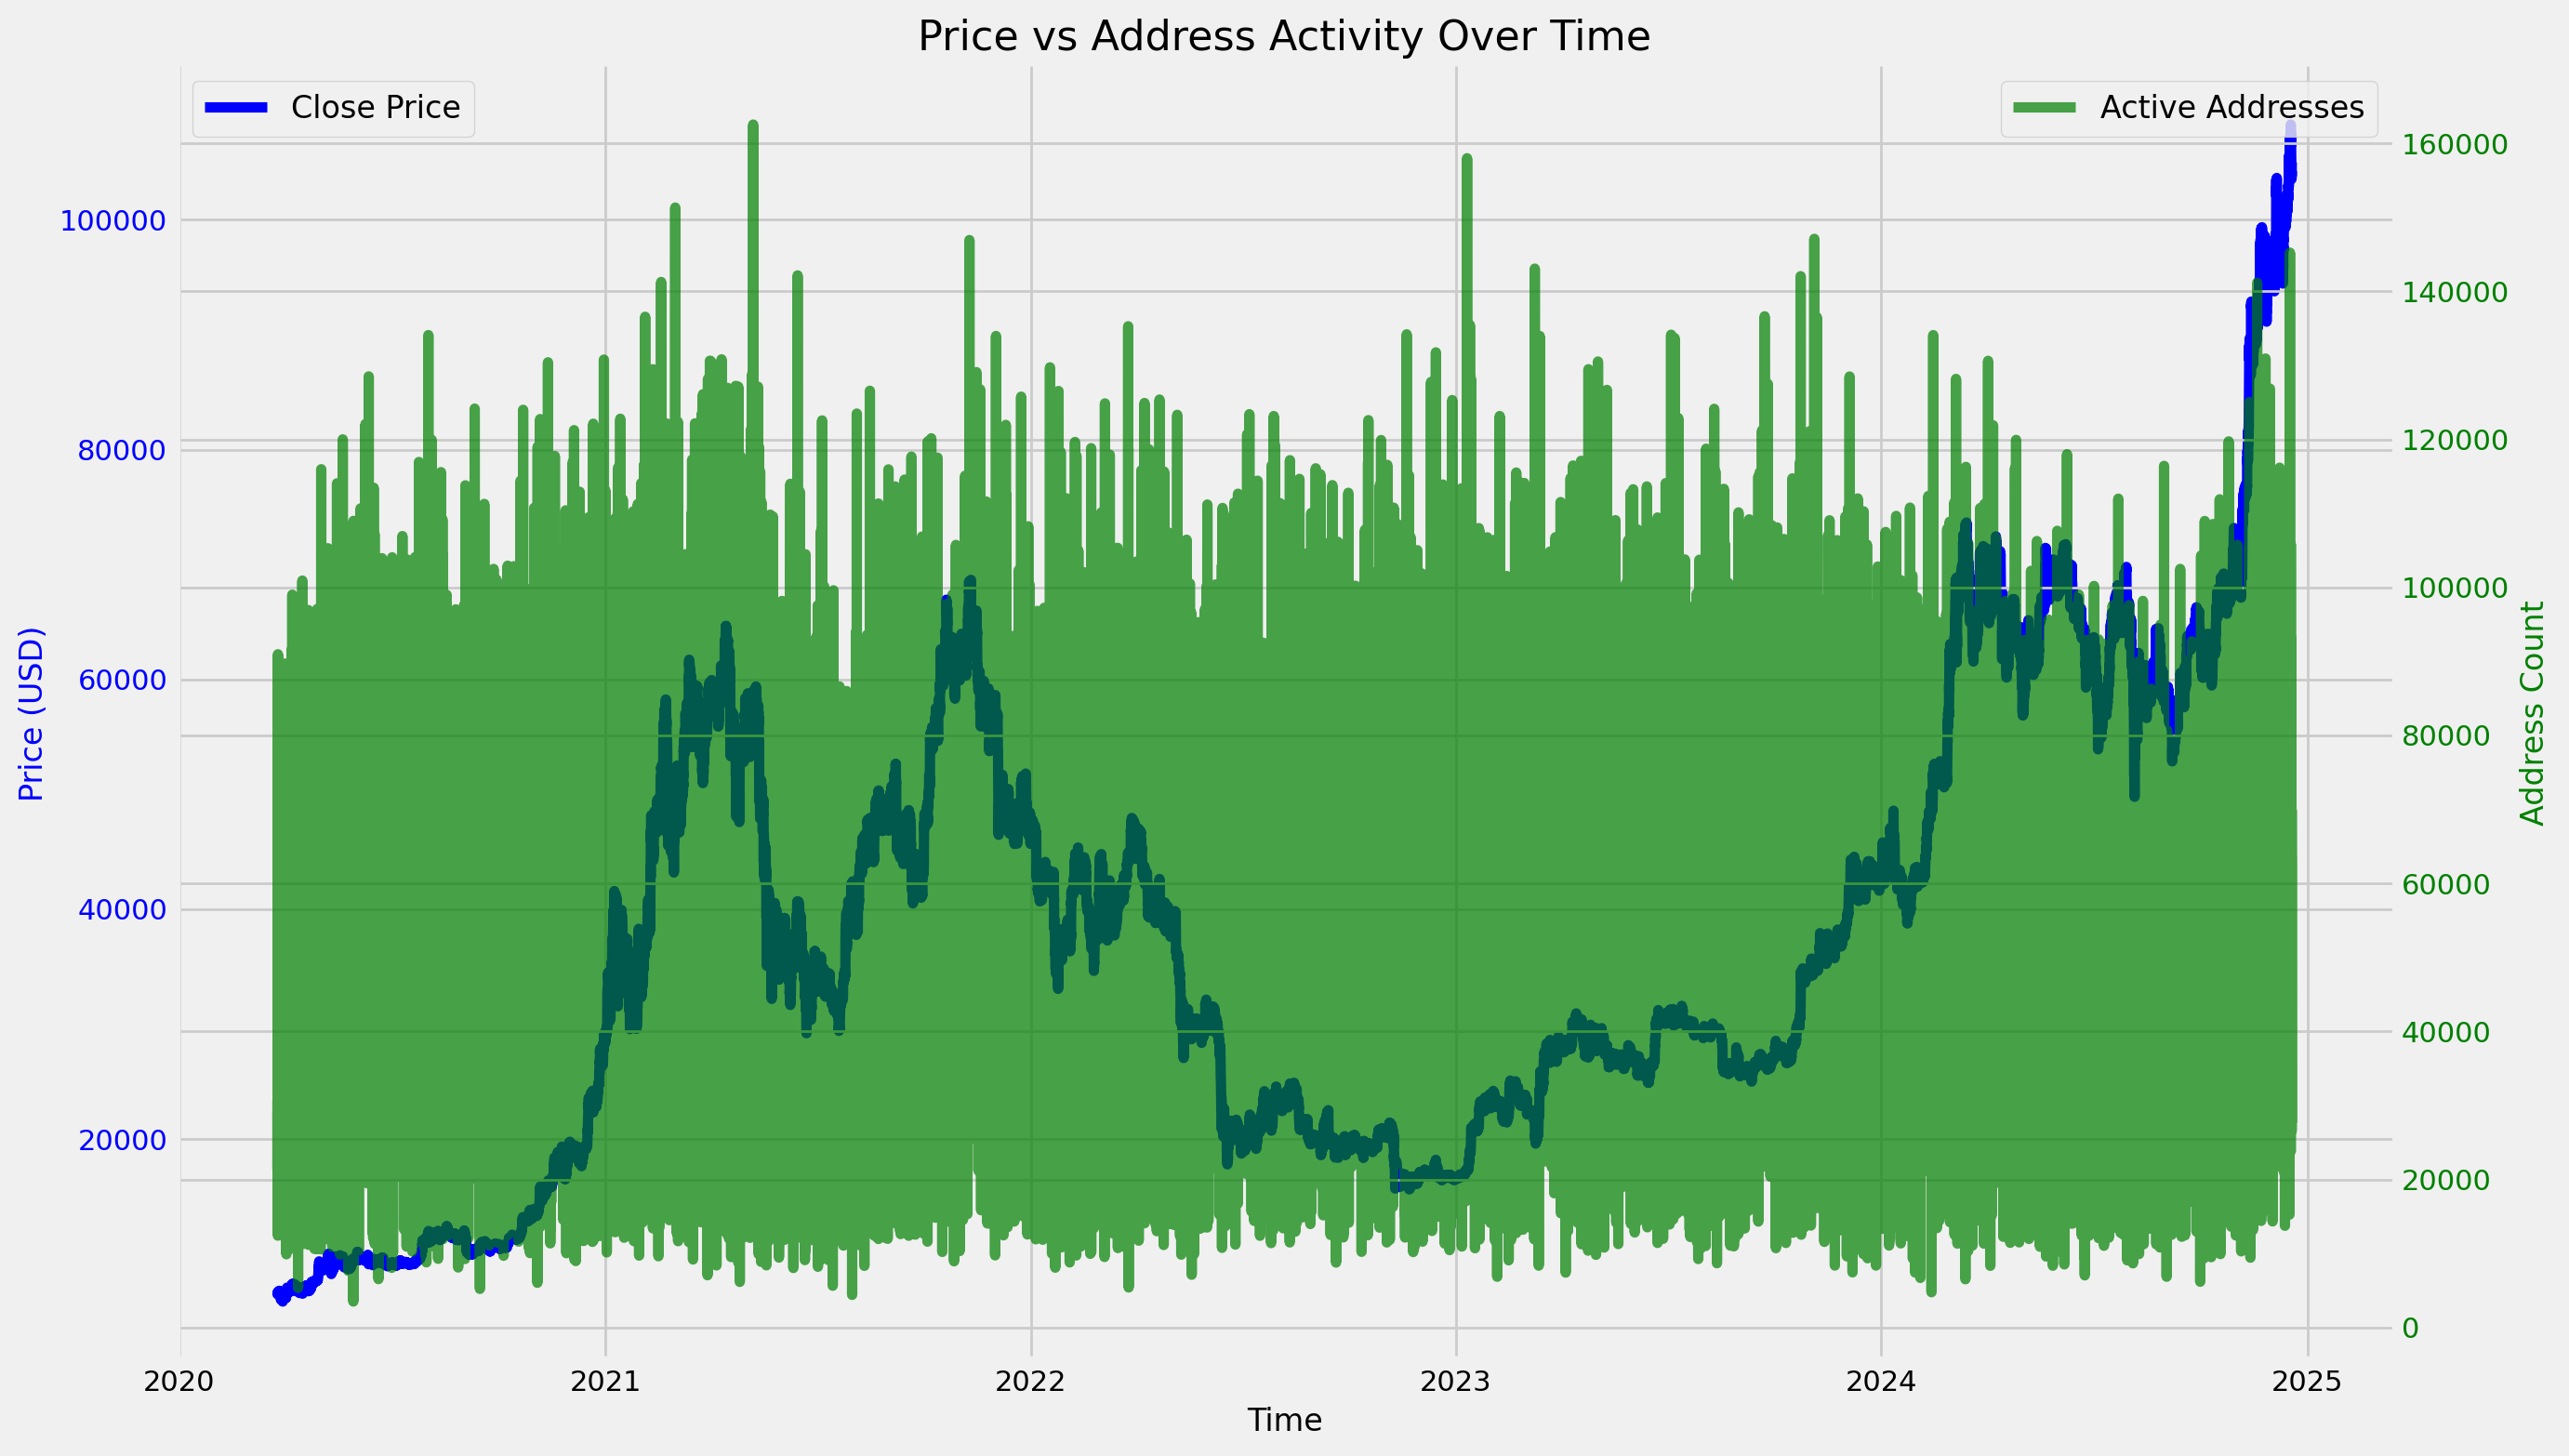

In [17]:
# Plot trends over time for price and address activity metrics
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot price (close price) on the first y-axis
ax1.set_title('Price vs Address Activity Over Time', fontsize=16)
ax1.plot(data['time'], data['close_price'], label='Close Price', color='blue')
ax1.set_xlabel('Time', fontsize=12)
ax1.set_ylabel('Price (USD)', fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')

# Create a second y-axis for address activity metrics
ax2 = ax1.twinx()
ax2.plot(data['time'], data['addresses_count_active'], label='Active Addresses', color='green', alpha=0.7)
# ax2.plot(data['time'], data['addresses_count_sender'], label='Sender Addresses', color='orange', alpha=0.7)
# ax2.plot(data['time'], data['addresses_count_receiver'], label='Receiver Addresses', color='purple', alpha=0.7)
ax2.set_ylabel('Address Count', fontsize=12, color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Add legends and grid
ax2.legend(loc='upper right')
fig.tight_layout()
plt.grid(True)

# Show the combined plot
plt.show()